<a href="https://colab.research.google.com/github/magantianirudh/Bayesian/blob/main/Bayesian_Analysis_for_health_insurance_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color='black'> **Bayesian Methods for Health Insurance Cost Analysis** <font>

In [6]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

input/insurance/insurance.csv


Introduction

### <font color='black'> **Problem Description** <font>

Medical insurance is essential for financial security, but its cost, availability, and coverage present challenges. Creating an accurate cost prediction model can aid budgeting, fair premium setting, and risk management. Traditional approaches have limitations; considering alternatives like Bayesian modeling or machine learning can enhance flexibility and predictive power. This project explores Bayesian methods, including Markov Chain Monte Carlo and Laplace Approximation, to model insurance costs using medical data and various regression models.


I. Explarotory data analysis
    
    I.1. General exploration

    I.2. Numerical features
        I.2.1. Explore and clean Numerical features
        I.2.2. Missing data of Numerical features

    I.3. Categorical features
        I.3.1. Explore and clean Categorical features
        I.3.2. Missing data of Categorical features
        I.3.3. Transform Categorical features into Binary features (get_dummies)

    I.4. Merge numerical and binary features into one data set
    
    I.5. Drop outliers from the train set

II.	Feature engineering

III.	Preparing data for modeling
    
    III.1. Split data into train and test and Standardization

    III.2. Backward Stepwise Regression

    III.3. Variance Inflation Factor

    III.4. Cook distance

IV.	Modeling

    * Frequentist Approach
    
    IV.1. Models and metrics selection

    IV.2. Hyperparameters tuning and model optimization
        IV.2.1. Ridge regression
        IV.2.2. Lasso regression
        IV.2.3. XGBoost regression
        IV.2.4. LightGBM regression

    IV.3. Choosing the best model
    
    * Bayesian Approach

    IV.4. MCMC for Linear Regression Models
    

Exploratory Data Analysis

1. **Problem Understanding:**
   - Analyze variables for their significance and meaning in the context of the problem.

2. **Univariable Study:**
   - Focus on the 'charges' variable to gain insights into its characteristics.

3. **Multivariate Study:**
   - Explore relationships between the dependent ('charges') and independent variables.

4. **Basic Cleaning:**
   - Handle missing data, outliers, and categorical variables in the dataset.

5. **Assumption Testing:**
   - Verify if data meets prerequisites for multivariate techniques.

### <font color='forestgreen'>  I.1. General Exploration <front>

#### 1.1. Loading libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

The Variance Inflation Factor (VIF) gauges multicollinearity in linear regression. If VIF exceeds 5 for a variable (exog_idx), it indicates high collinearity with other variables. This can lead to inflated standard errors in parameter estimates, suggesting caution in interpreting the variable's contribution.

In [9]:
import sklearn

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [10]:
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(rc={"figure.figsize": (20, 15)})

sns.set_style("whitegrid")

#### 1.2. Loading the Data sets

In [11]:
# Train set
df_train = pd.read_csv("input/insurance/insurance.csv")

# Printing the Training set
print(df_train)

# Checking the dimensions of this dataset
print(df_train.shape)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
(1338, 7)


In [12]:
# Using f-string
print(f"Train set shape: {df_train.shape} \n")

Train set shape: (1338, 7) 



#### 1.3. Checking for missing data

In [13]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing values detected.

### <font color='forestgreen'>  I.2. Numerical Feature <front>

### <font color='darkblue'>I.2.1. Exploring and cleaning numerical features</font>

#### 1.2.1.1. Extracting Nnumerical features

This subsection begins by focusing on isolating numerical columns from the entire training dataset. The subsequent lines of code execute the necessary operations to achieve this objective.

In [14]:
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520

Hence, we have 4 numerical independent variables all told in the training set.

We can also use this alternative command leading to the same result.

In [15]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_num.head()

age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520

#### 1.2.1.2. Features distribution

Although regression models typically entail various distributional assumptions, one exception is the distribution of predictor (i.e., independent) variables, which has no specific assumptions. Nevertheless, it can be beneficial to explore the distribution of predictor variables to identify influential outliers or concentrated values. In cases where an independent variable exhibits significant skewness, applying a transformation can render it more symmetric. This perspective treats a predictor as random, termed Type II regression or Major Axis regression.

Now, let's examine the distribution of our two samples.

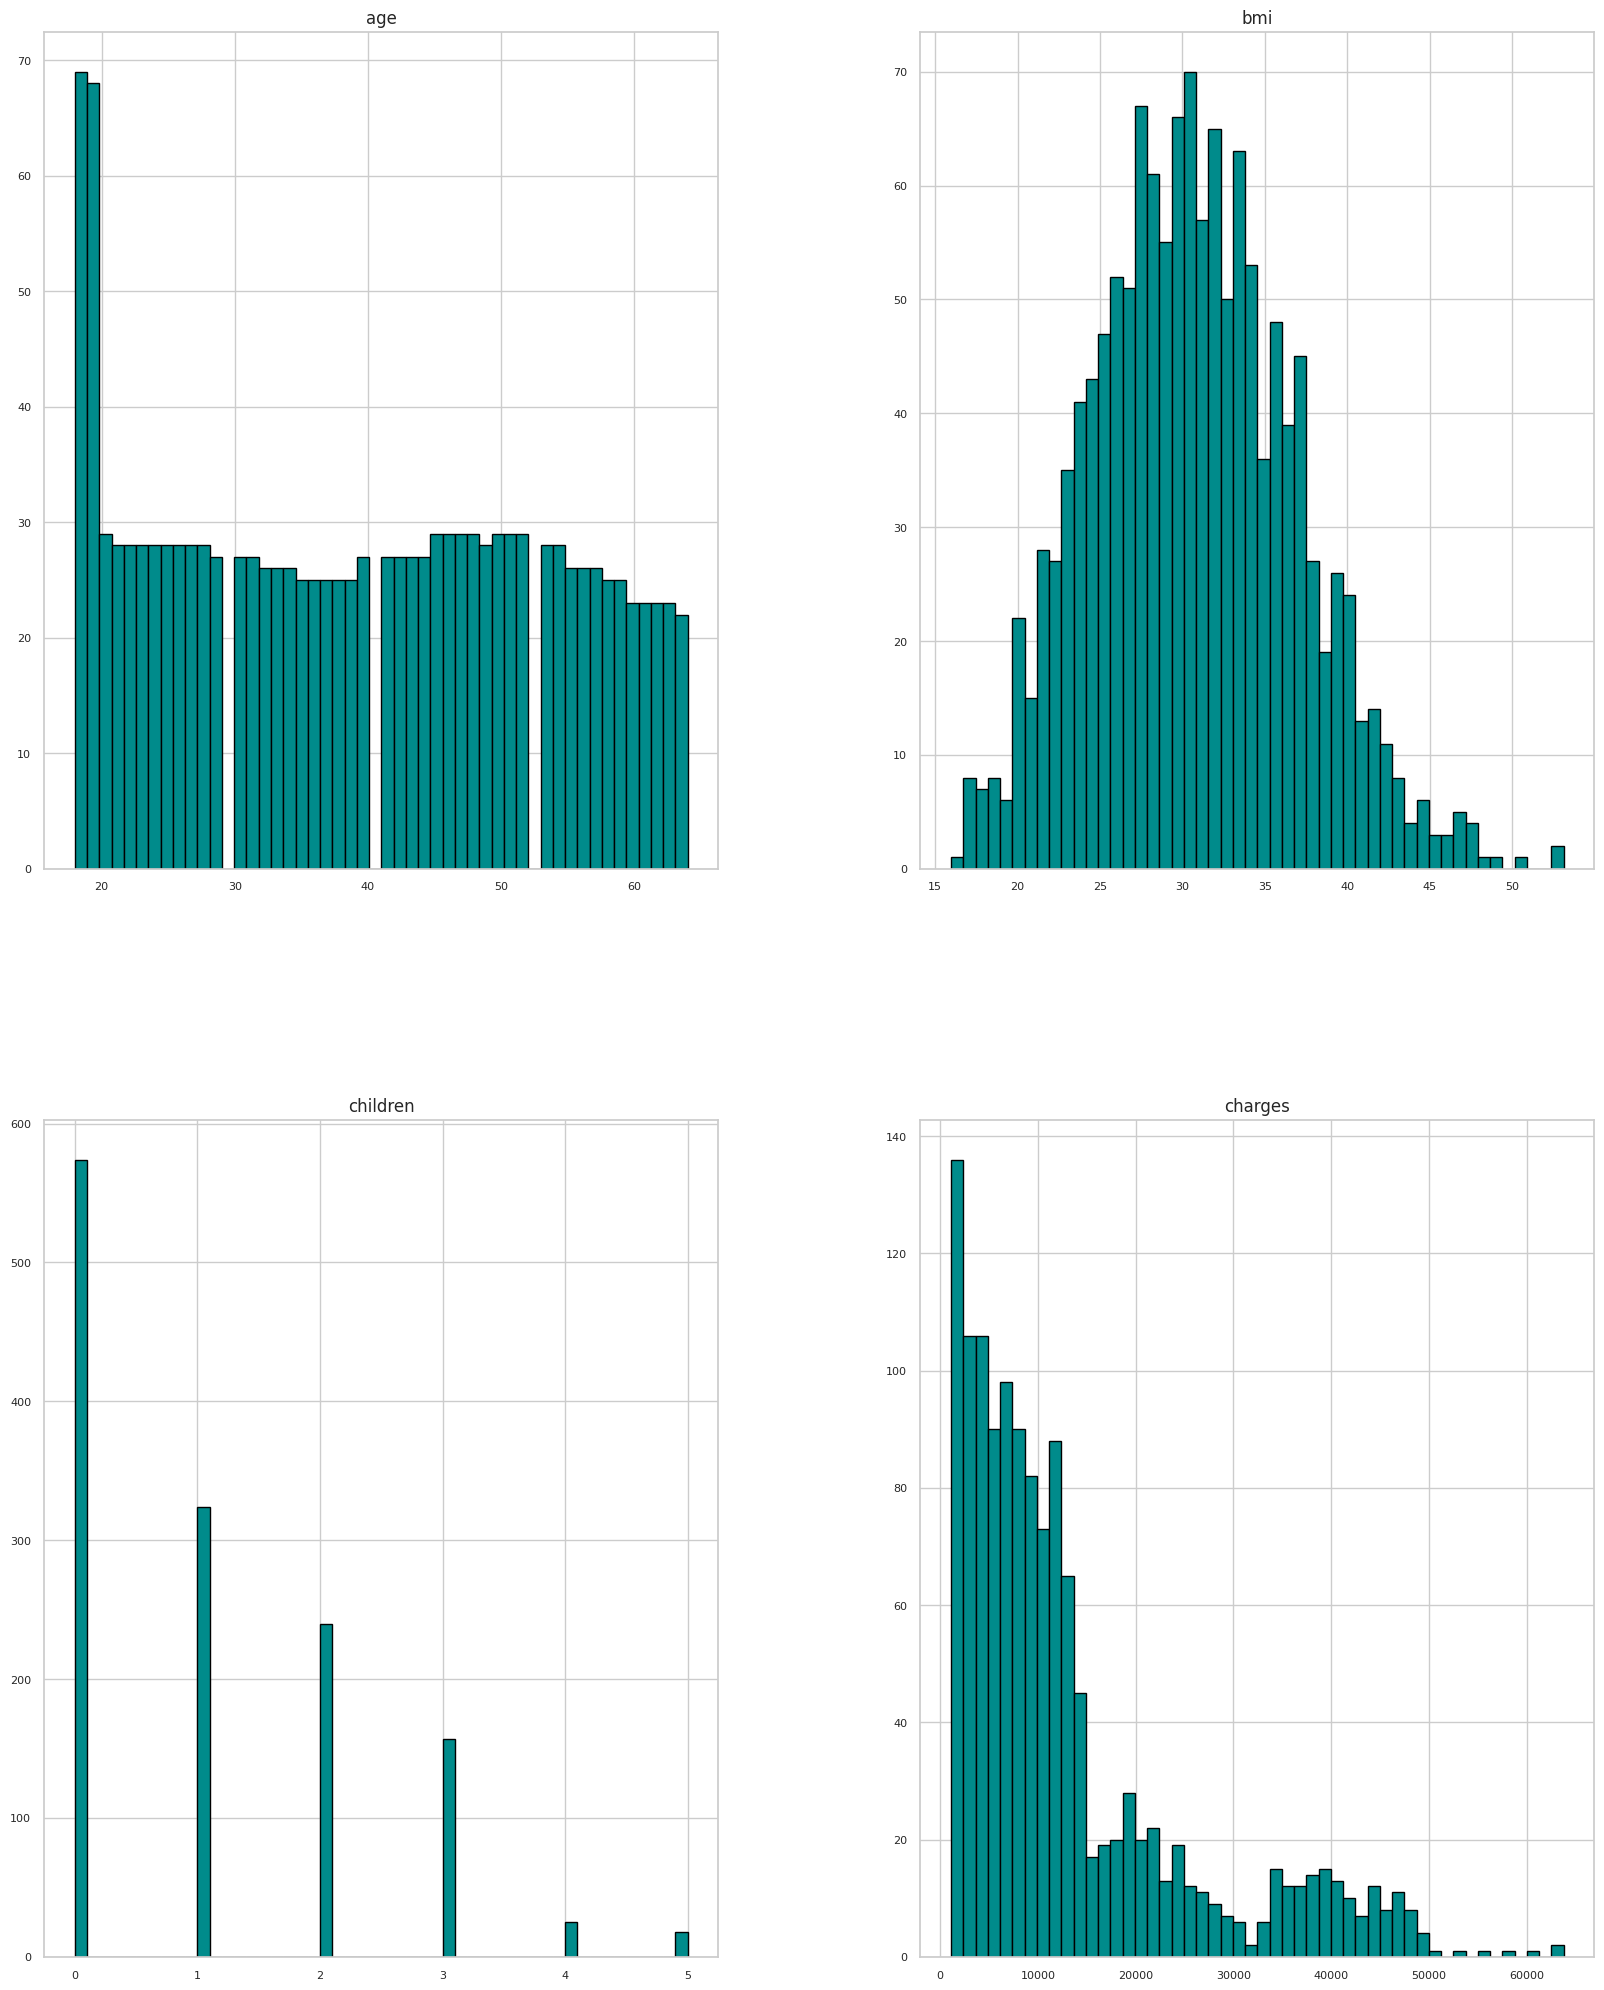

In [16]:
fig_ = df_train_num.hist(figsize=(20, 25), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

The distribution of insurance charges is noticeably skewed to the right, indicating a strong positive skewness, while the distribution of BMI is roughly symmetrical.

#### 1.2.1.3. Quasi-Constant variables

In [17]:
# Displaying a specific colunm
print(df_train_num[:]['children'])
print(df_train_num[:]['age'])

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64
0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64


In [18]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 3

Number of quasi_constant features: 0

Quasi-constant features to be dropped: []


In [19]:
# Checking the dimensions of the set obtained
print(df_train_num.shape)

(1338, 4)


#### 1.2.1.4. Scatterplot

The scatterplot, a widely embraced and straightforward visualization tool, is instrumental in exploring relationships between two or more variables. While it illuminates potential associations, it is crucial to exercise caution, as the presence of patterns in a graph doesn't necessarily imply causation. Careful interpretation of obtained graphs is essential. Additionally, the scatterplot proves versatile for dataset analysis by facilitating outlier detection, handling irregular time-dependent data through time series plots, and assessing the effectiveness of regression models.

#### 1.2.1.4.1.  Relationship Assessment

In [103]:
# Extracting column names as a list
# cols = list (df_train_num.columns)
# cols

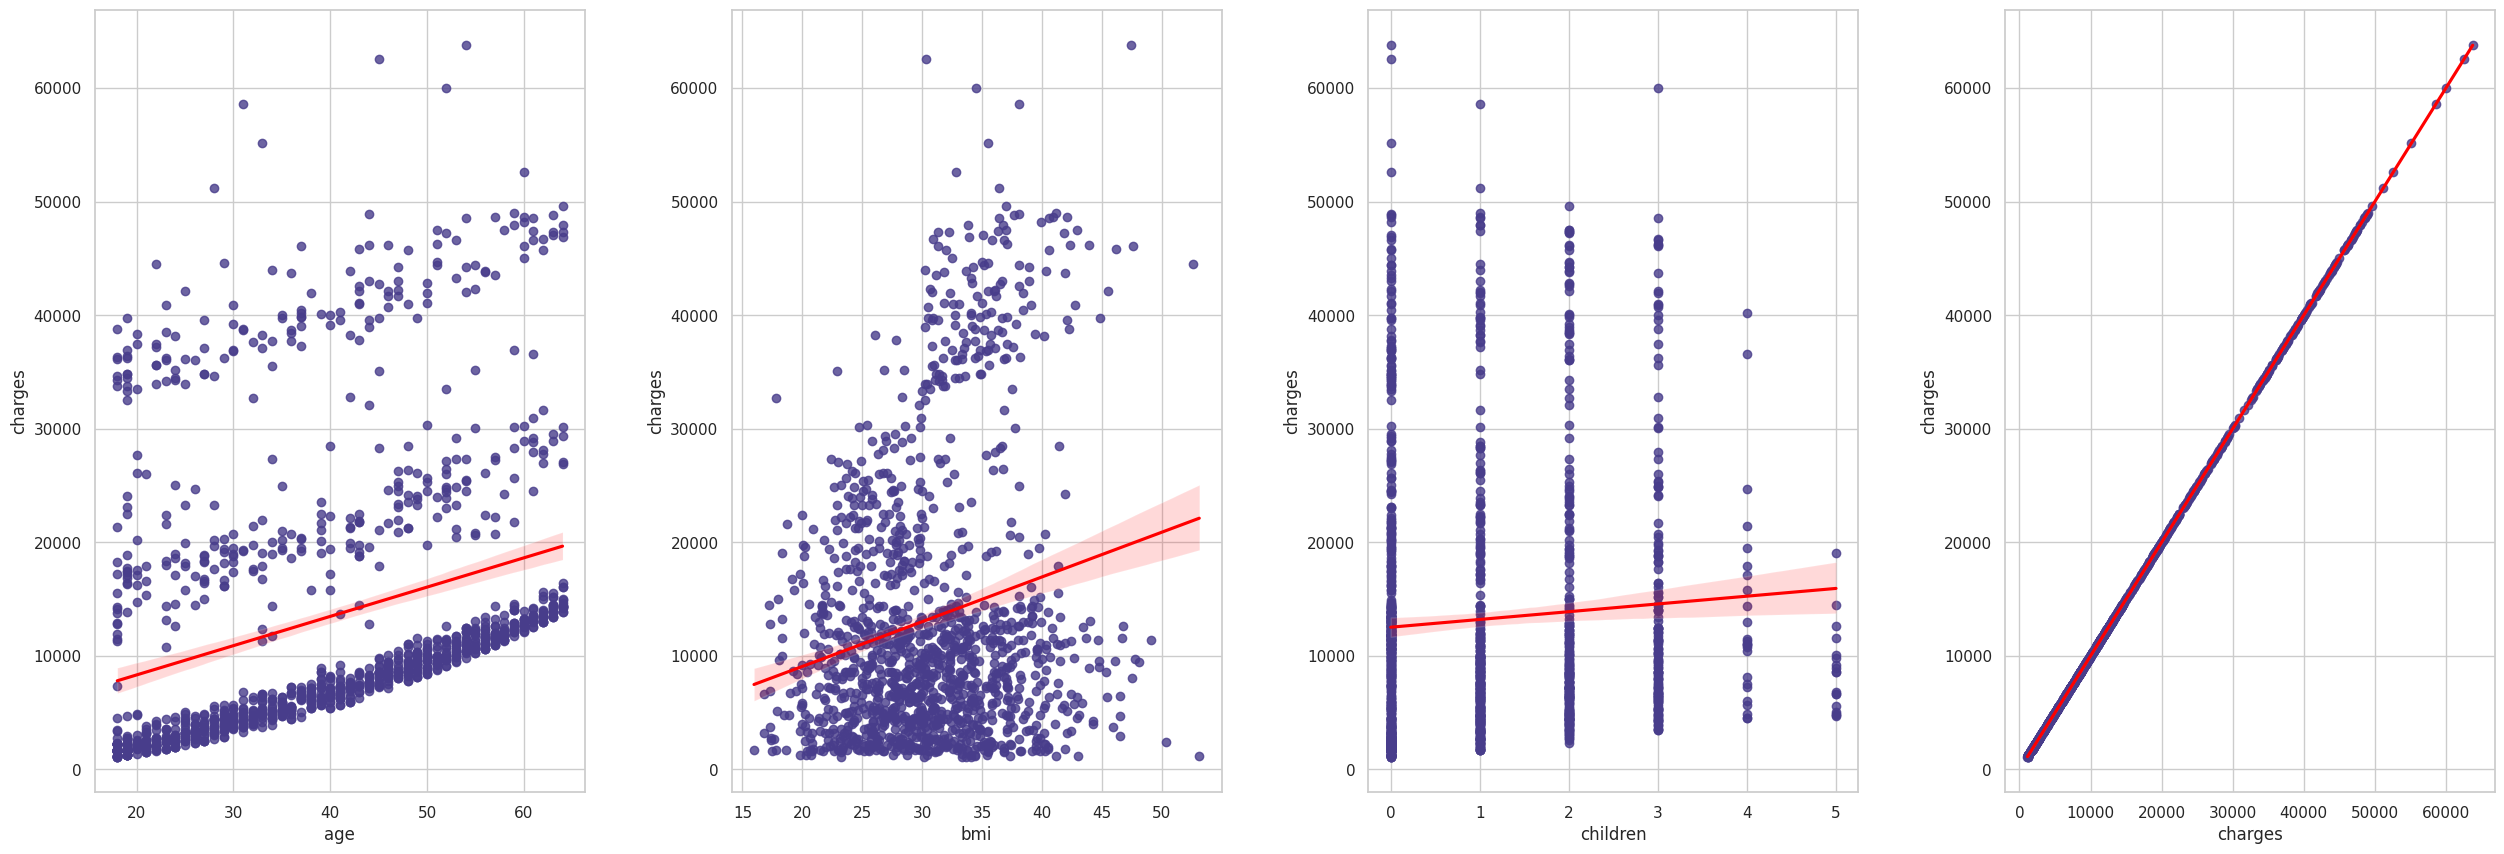

In [104]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(8,4,i+1)
        sns.regplot(x=col, y= "charges", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

**Interpretation**

**Form and Direction:**
A noteworthy pattern of interest in data analysis is the identification of a linear pattern, characterized by a visual resemblance to a line either ascending or descending. The red line depicted in each graph represents the fitted line derived from a linear regression. A linear relationship between variables X and Y is evident when their values exhibit a pattern parallel to the red line, indicating either a positive correlation (uphill) or a negative correlation (downhill). In the depicted figure, there is a discernible positive linear relationship between insurance charges and the predictors. Essentially, as the assigned value to the predictor representing the insurance contractor's characteristics increases, the insurance charge also experiences an increase. It is essential to note that while the scatterplot suggests a linear relationship, it doesn't imply causation.

**Strength:**
Another critical aspect of interpreting scatterplots lies in assessing the strength of the relationship between variables. The slope of the fitted line offers insights into this strength. The strongest linear relationship occurs when the slope is 1, indicating that a unit increase in one variable corresponds to an equivalent increase in the other. This scenario is represented by a line at a 45-degree angle. The strength of the relationship between two variables holds crucial information, but relying solely on scatterplot interpretation is subjective. To attain more precise evidence, a coefficient is computed to measure the strength of the investigated relationship.

#### 1.2.1.4.2. Correlation

A correlation matrix is a tabular representation of correlation coefficients between various variables. This matrix illustrates the correlation among all potential pairs of values in a comprehensive manner.

#### Pearson's Correlation

It serves as a potent tool for condensing extensive datasets and assessing the extent of linear relationships between independent variables and the target variable. Let's proceed to examine this aspect.

<Axes: >

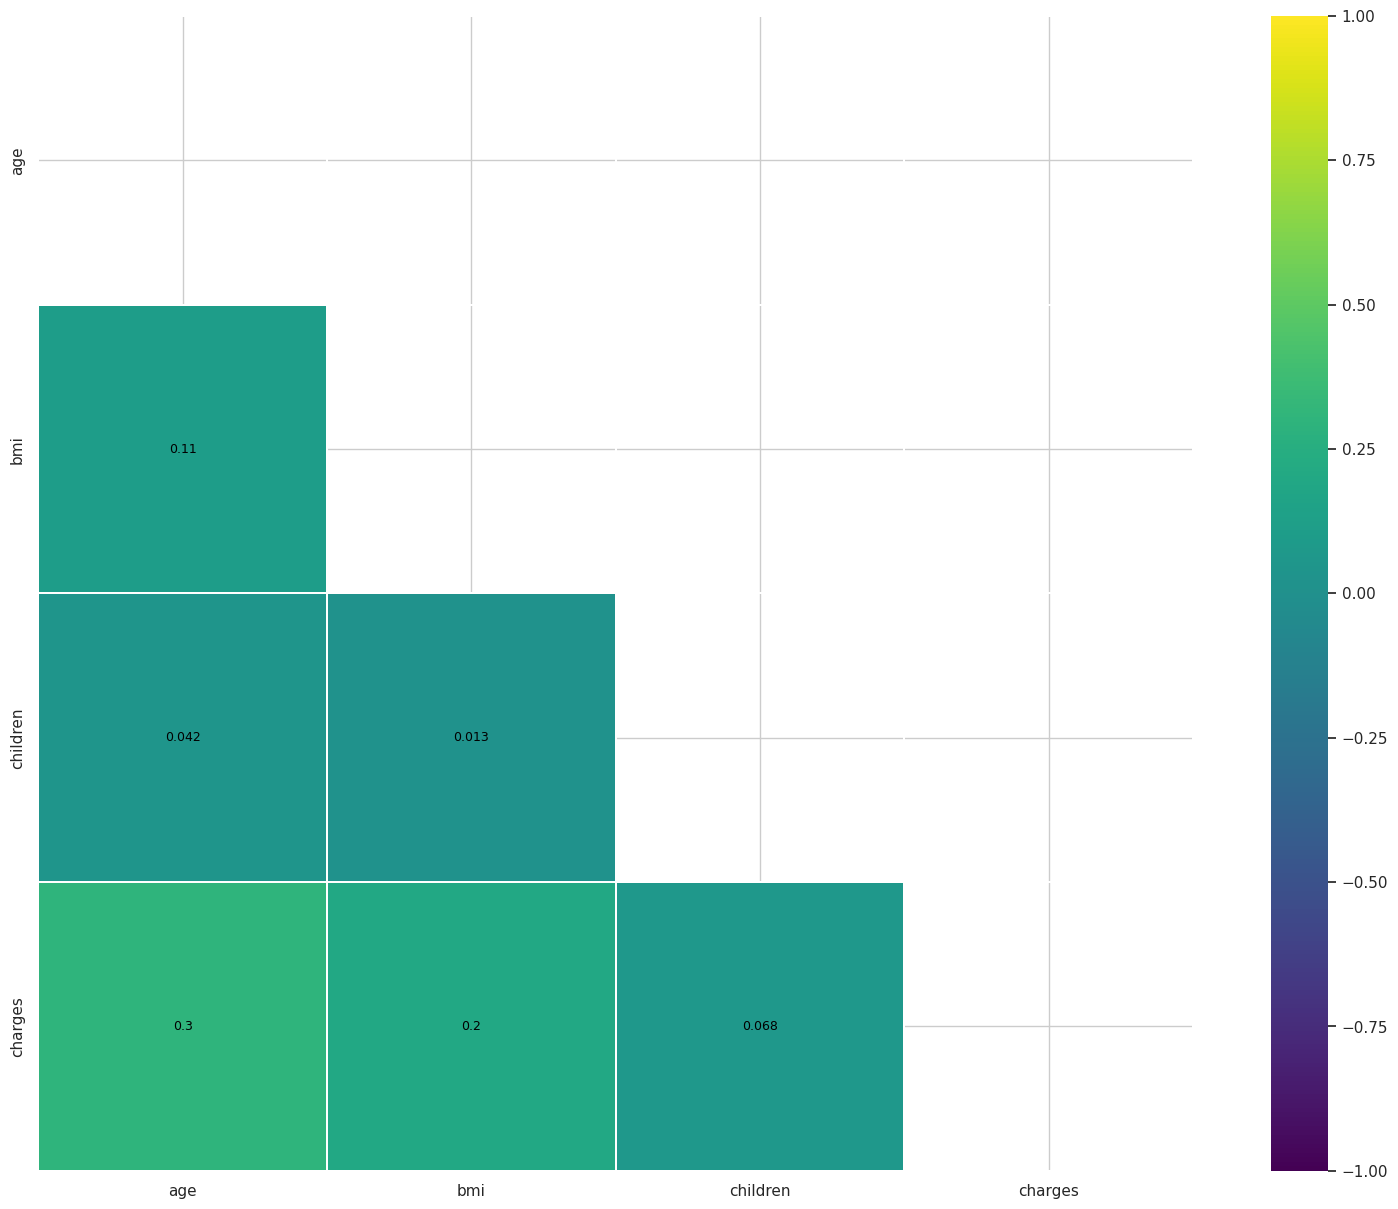

In [105]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
# (method = pearson: standard correlation coefficient)
corr_matrix = df_train_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.0005) & (corr_matrix > -0.0005)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

**Strength of Relationship**

- If |r| < 0.3, it implies none or a very weak relationship.
- For 0.3 < |r| < 0.5, the relationship is considered weak.
- In the range of 0.5 < |r| < 0.7, the relationship is deemed moderate.
- When |r| > 0.7, the relationship is characterized as strong.

Correlation values around 0.7 or higher indicate a robust relationship, suggesting that only one of the two variables is necessary for analysis. This consideration is vital in the context of feature selection. Consequently, we will examine two types of correlation: one between the variable of interest (insurance charges) and the predictors, and another within independent variables.

The analysis reveals a very weak linear relationship between insurance charges and the following predictors, listed in descending order:

- Age of the primary beneficiary
- Body Mass Index
- Number of children covered by health insurance / Number of dependents

Despite the weak correlations, all these predictors will be retained, given the limited number of numerical features available.

In [106]:
df_num_corr = df_train_num.corr()["charges"][:-1]

######################################
# Correlated features (0.1 < r2)
weak_features_list = df_num_corr[(abs(df_num_corr) > 0.0005)].sort_values(ascending=False)
print(f"{len(weak_features_list)} Weakly correlated predictors with charges kept:\n{weak_features_list}")

# Features with low correlation (between 0.3 and 0.5)
weak_features = df_num_corr[(abs(df_num_corr) >= 0.0005)].index.tolist()
weak_features.append("charges")

df_weak_features = df_train_num.loc[:, weak_features]

3 Weakly correlated predictors with charges kept:
age        0.30
bmi        0.20
children   0.07
Name: charges, dtype: float64


Let's see what our training set looks like now.

In [107]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = weak_features[:]

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

df_train_num.head()

age   bmi  children   charges
0   19 27.90         0 16,884.92
1   18 33.77         1  1,725.55
2   28 33.00         3  4,449.46
3   33 22.70         0 21,984.47
4   32 28.88         0  3,866.86

#### Rank Correlation

In statistics, a rank correlation evaluates the ordinal association between rankings of different variables or the same variable. It assesses the similarity between two rankings and gauges the significance of their relationship. Common rank correlation coefficients, like Kendall's τ and Spearman's ρ, are not applicable in this context due to the nature of numerical variables involved.

#### 1.2.1.4.3. Outliers

The correlation coefficient, relying on means and standard deviations, is sensitive to outliers, significantly impacted by extreme observations termed influential. Their inclusion in the analysis can diminish a strong relationship to a moderate one, especially impactful in small datasets. With larger samples, the influence of outliers tends to decrease. Correlations, while informative, are just one aspect of understanding the relationship between variables; additional analyses are crucial for comprehensive insights.

Scatterplots effectively visualize outliers but lack a systematic method for identification. Notably, certain observations in variables like "LotFrontage," "YearBuilt," and "GarageArea" appear distant from the statistical relationship line. Determining the extent of their extremeness, especially in a multidimensional context, is challenging. To address multivariate outliers, distance metrics become valuable. These metrics quantify the distance between vectors, applicable to various observations or comparisons with the mean vector, regardless of the dataset's variable count.

#### 1.2.1.4.3.1. Bivariate Outliers detection Using Mahalanobis Distance

Mahalanobis Distance (MD) is a robust metric for measuring the distance between a point and a distribution. Particularly effective in multivariate scenarios, MD utilizes variable covariance matrices to assess the distance from data points to the center. Unlike Euclidean distance, MD identifies outliers by considering the distribution pattern of data points.

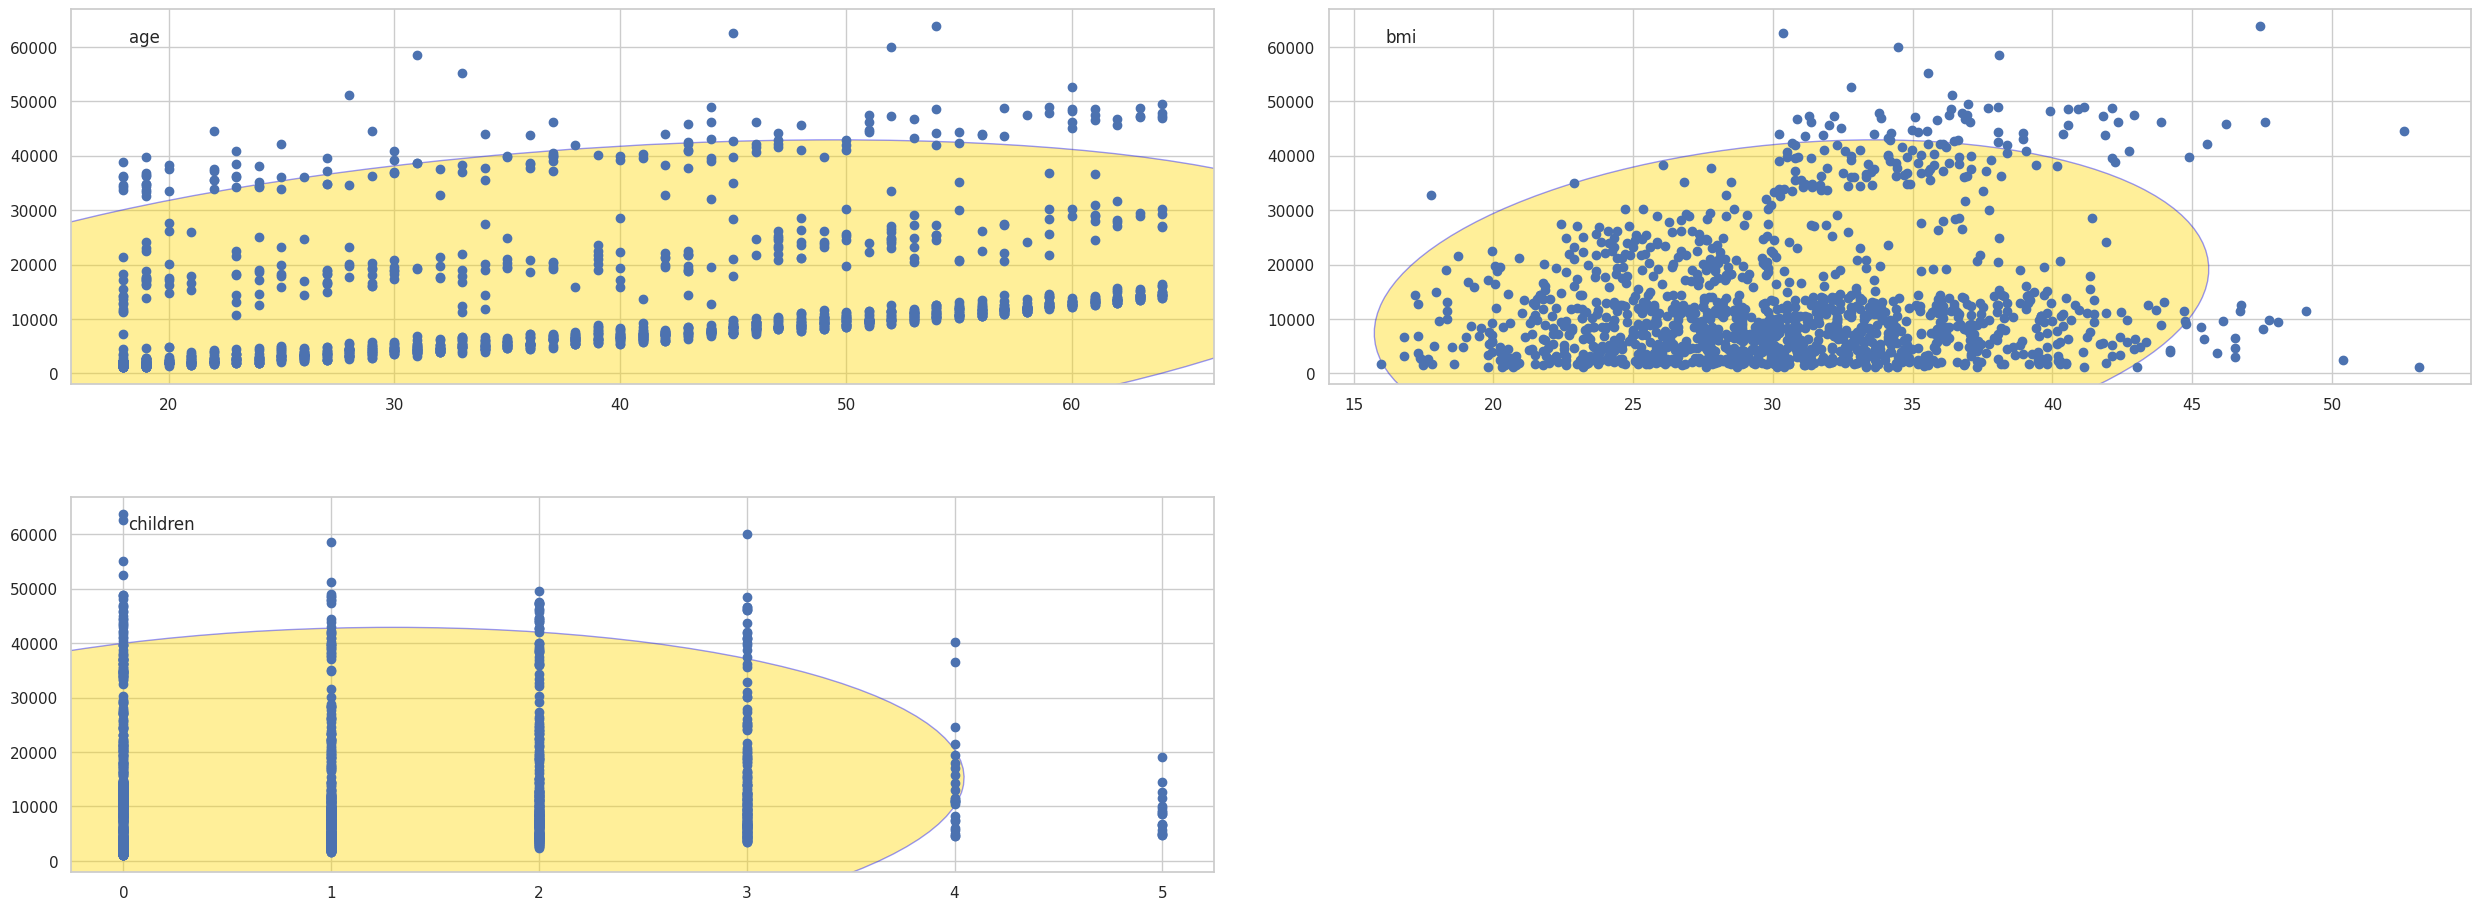

In [108]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.1,
                    hspace=0.3)
for i, col in enumerate(df_train_num.iloc[:, :-1].columns):
    df = df_train_num[[col, 'charges']]
    df = df.dropna()
    df = df.to_numpy()

    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)

    # Distances between center point and
    distances = []
    for j, val in enumerate(df):
            p1 = val
            p2 = centerpoint
            distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
            distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    #print('--- Index of Outliers ----')
    #print(outlierIndexes)

    #print('--- Observations found as outlier -----')
    #print(df[ distances > cutoff , :])

    ## Finding ellipse dimensions
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)

    # Ellipse patch
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='blue')
    ellipse.set_facecolor('gold')
    ellipse.set_alpha(0.4)
    ax = plt.subplot(15, 2, i+1)
    ax.add_artist(ellipse)
    #ellipse.set_hatch('+')
    plt.scatter(df[: , 0], df[ : , 1])
    ax.text(.05, .95, col , transform=ax.transAxes, ha="left", va="top")

The graphs above highlight outliers as points beyond the ellipse, which signifies the region encapsulating non-outlier values based on Mahalanobis Distance. In the subsequent subsection, we'll specifically address and eliminate these outliers.

#### 1.2.1.4.3.2. Handling Outliers

These are some of the methods for treating the outliers:

* Trimming/removing the outlier
* Quantile based flooring and capping
* Mean/Median imputation

Due to the absence of pertinent arguments supporting the reliability of these techniques, we will proceed to the next steps, acknowledging the need for further analysis in this context.

### <font color='darkblue'>I.2.2. Missing data of Numerical features </font>

This subsection is intended to treat missing values among numerical features. But there is no missing values.

### <font color='forestgreen'>  I.3. Categorical features <front>

### <font color='darkblue'>I.3.1. Explore and clean Categorical features</font>

This section will focus on categorical features in our pool explanatory variables. The first step will consist of separating thos features of interest from both data sets and then processing them.

In [109]:
df_train

age     sex   bmi  children smoker     region   charges
0      19  female 27.90         0    yes  southwest 16,884.92
1      18    male 33.77         1     no  southeast  1,725.55
2      28    male 33.00         3     no  southeast  4,449.46
3      33    male 22.70         0     no  northwest 21,984.47
4      32    male 28.88         0     no  northwest  3,866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male 30.97         3     no  northwest 10,600.55
1334   18  female 31.92         0     no  northeast  2,205.98
1335   18  female 36.85         0     no  southeast  1,629.83
1336   21  female 25.80         0     no  southwest  2,007.94
1337   61  female 29.07         0    yes  northwest 29,141.36

[1338 rows x 7 columns]

#### 1.3.1.1. Extracting Categorical Features

In [110]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("charges")

# Train set
df_train_categ = df_train[categorical_features]
print(df_train_categ)

         sex smoker     region   charges
0     female    yes  southwest 16,884.92
1       male     no  southeast  1,725.55
2       male     no  southeast  4,449.46
3       male     no  northwest 21,984.47
4       male     no  northwest  3,866.86
...      ...    ...        ...       ...
1333    male     no  northwest 10,600.55
1334  female     no  northeast  2,205.98
1335  female     no  southeast  1,629.83
1336  female     no  southwest  2,007.94
1337  female    yes  northwest 29,141.36

[1338 rows x 4 columns]


In [111]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")

Training set shape (Categorical features): (1338, 4)



As displayed, we have 3 categorical varaibles in the training data set.

The next setp now is to look at the Countplot for each of the categorical features in the training set in order to determine which categorical features are dominated by one outcome. This method is used to show the counts of observations in each categorical feature using bars.

#### 1.3.1.2. Counter Plots

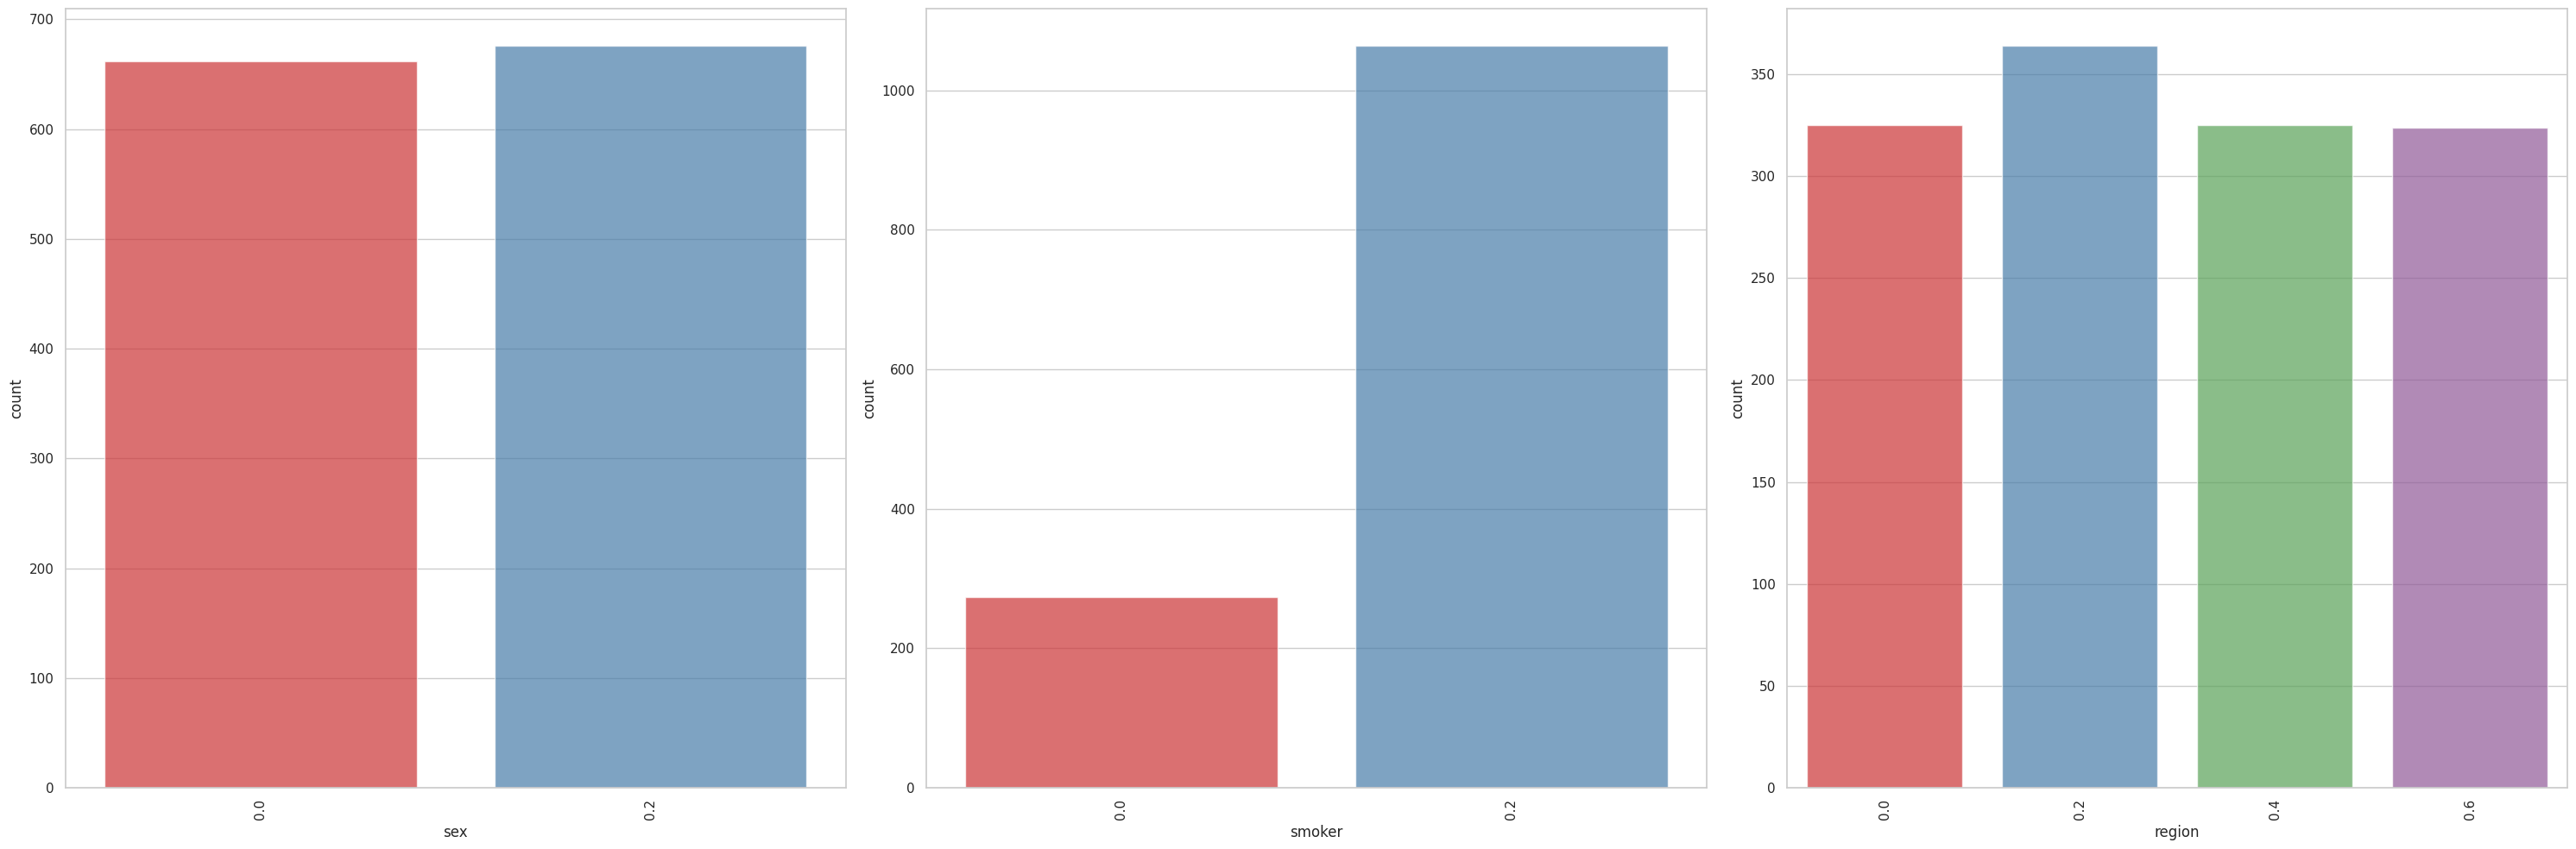

In [112]:
fig, axes = plt.subplots(round(len(df_train_categ.columns) / 4), 3, figsize=(30, 10))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax, palette = "Set1")

fig.tight_layout()

A count plot can be thought of as a histogram across a categorical, instead of quantitative variable. As a result, we don't want those predictors with a prevalent outcome such as smoker for instance because they don't contribute significantly to training our model. It's quite similar to the issue of quasi-constant variable we dealed with regarding numerical feature.  

Secondly, it's worth a look at the variation of the target variable with respect to each categorical feature.

#### 1.3.1.3. Box Plots

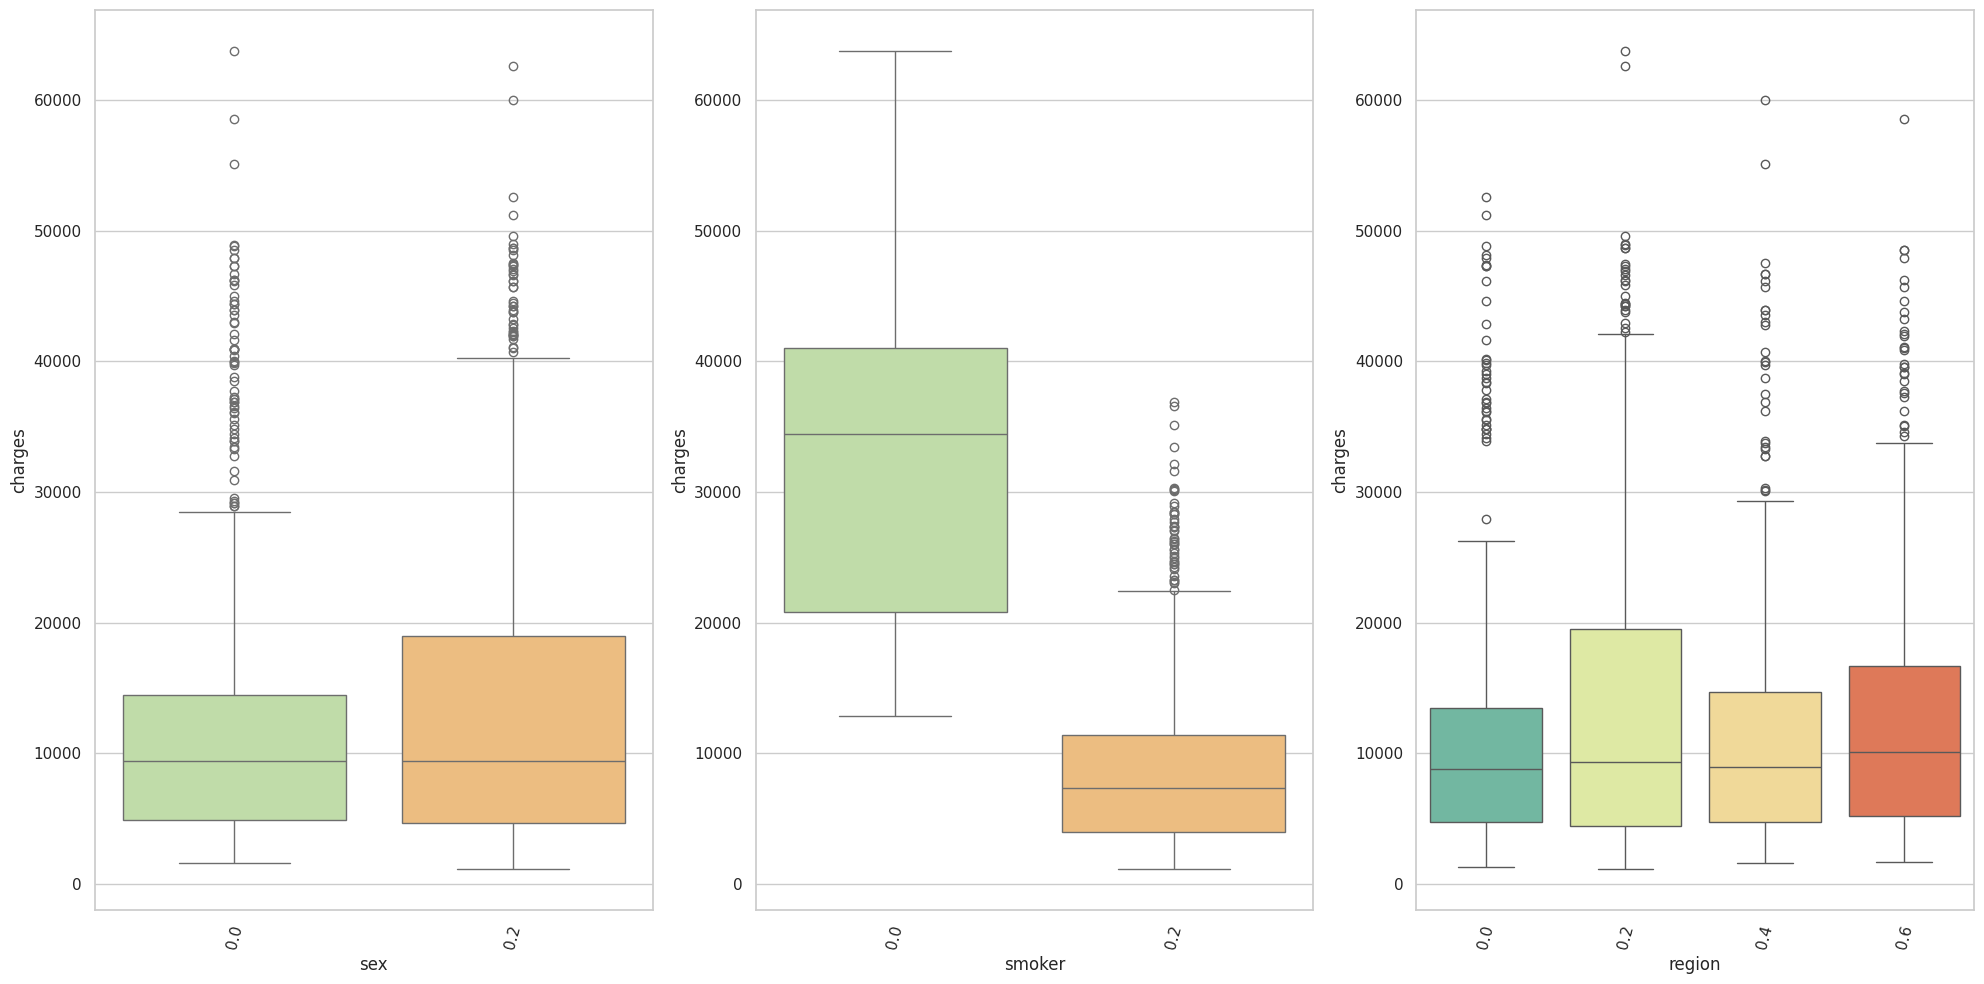

In [113]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 3, figsize= (20, 10))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_train_categ.columns[i], y="charges", data=df_train_categ, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [114]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")

Training set shape (Categorical features): (1338, 4)



Eventually, we have 25 categorical features in our pool now. About a half of what we had initially has been dropped by conducting this cleaning operation.  

### <font color='darkblue'>I.3.2. Missing data of Categorical features</font>

No missing values!

### <font color='darkblue'>I.3.3. Transform Categorical features into Binary features</font>

Before combining the categorical data with the numerical data obtained after cleansing, we need to transform the categorical entries into numerical entries. This will be done using the get_dummies() function where each categorical feature will be transformed into a binary feature.

In [115]:
# Drop the SalePrice column from the training dataset
df_train_categ.drop(["charges"], axis = 1, inplace = True)

# Use get_dummies to transform the Categorical features into Binary features (Training dataset)
df_train_dummies = pd.get_dummies(df_train_categ)

#  drop one of the dummy variables
df_train_dummies = df_train_dummies.drop('region_northeast', axis=1)
df_train_dummies = df_train_dummies.drop('smoker_no', axis=1)
df_train_dummies = df_train_dummies.drop('sex_female', axis=1)


# Display the data
df_train_dummies.head()

sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
0         0           1                 0                 0                 1
1         1           0                 0                 1                 0
2         1           0                 0                 1                 0
3         1           0                 1                 0                 0
4         1           0                 1                 0                 0

In [116]:
print(f"Training set shape (Categorical features): {df_train_dummies.shape}\n")

Training set shape (Categorical features): (1338, 5)



### <font color='forestgreen'>I.4. Merge numerical and binary features into one data set</font>

This aims to join numerical and categorical datasets together before the modeling.

In [117]:
# Training set
df_train_new = pd.concat([df_train_num, df_train_dummies], axis = 1)
print(f"Train set: {df_train_new.shape}")

df_train_new

charges = df_train_new['charges']

Train set: (1338, 9)


In [118]:
df_train_new

age   bmi  children   charges  sex_male  smoker_yes  region_northwest  \
0      19 27.90         0 16,884.92         0           1                 0   
1      18 33.77         1  1,725.55         1           0                 0   
2      28 33.00         3  4,449.46         1           0                 0   
3      33 22.70         0 21,984.47         1           0                 1   
4      32 28.88         0  3,866.86         1           0                 1   
...   ...   ...       ...       ...       ...         ...               ...   
1333   50 30.97         3 10,600.55         1           0                 1   
1334   18 31.92         0  2,205.98         0           0                 0   
1335   18 36.85         0  1,629.83         0           0                 0   
1336   21 25.80         0  2,007.94         0           0                 0   
1337   61 29.07         0 29,141.36         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1338 rows x 9 columns]

# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> Feature Engineering </p> <font size="4">

Now, we consider the continuous numerical variables that are skewed. A Log transformation will be applied to the skewed numerical variables to help mitigate the strong variation of some variables, and to reduce redundancy. The continuous features are defined below.

In [119]:
continuous_features = ["bmi", "age", "children"]
df_skew_verify = df_train_new.loc[:, continuous_features]
df_skew_verify.head()

bmi  age  children
0 27.90   19         0
1 33.77   18         1
2 33.00   28         3
3 22.70   33         0
4 28.88   32         0

To obtain the skewed features, we take out variables that are more than 50% skewed.

In [120]:
df_skew_verify = df_train_new.loc[:, continuous_features]

# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})


sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['children']


A log transformation can now be applied to the skewed features listed above.

In [121]:
# Log transformation of the skewed features
#for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Training set
 #   df_train_new[i] = np.log((df_train_new[i])+1)

Looking at the distribution of the numerical features right from the begining, we can notice that "charges" is skewed as well. To help normalize this variable, a log transformation will be applied to "charges" as well.

In [122]:
# Log transformation of the target variable "charges"
df_train_new["chargeslog"] = np.log(df_train_new.charges)

# Drop the original "charges"
df_train_new.drop(["charges"], axis=1, inplace=True)

In [123]:
# Display the final dataset
df_train_new['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

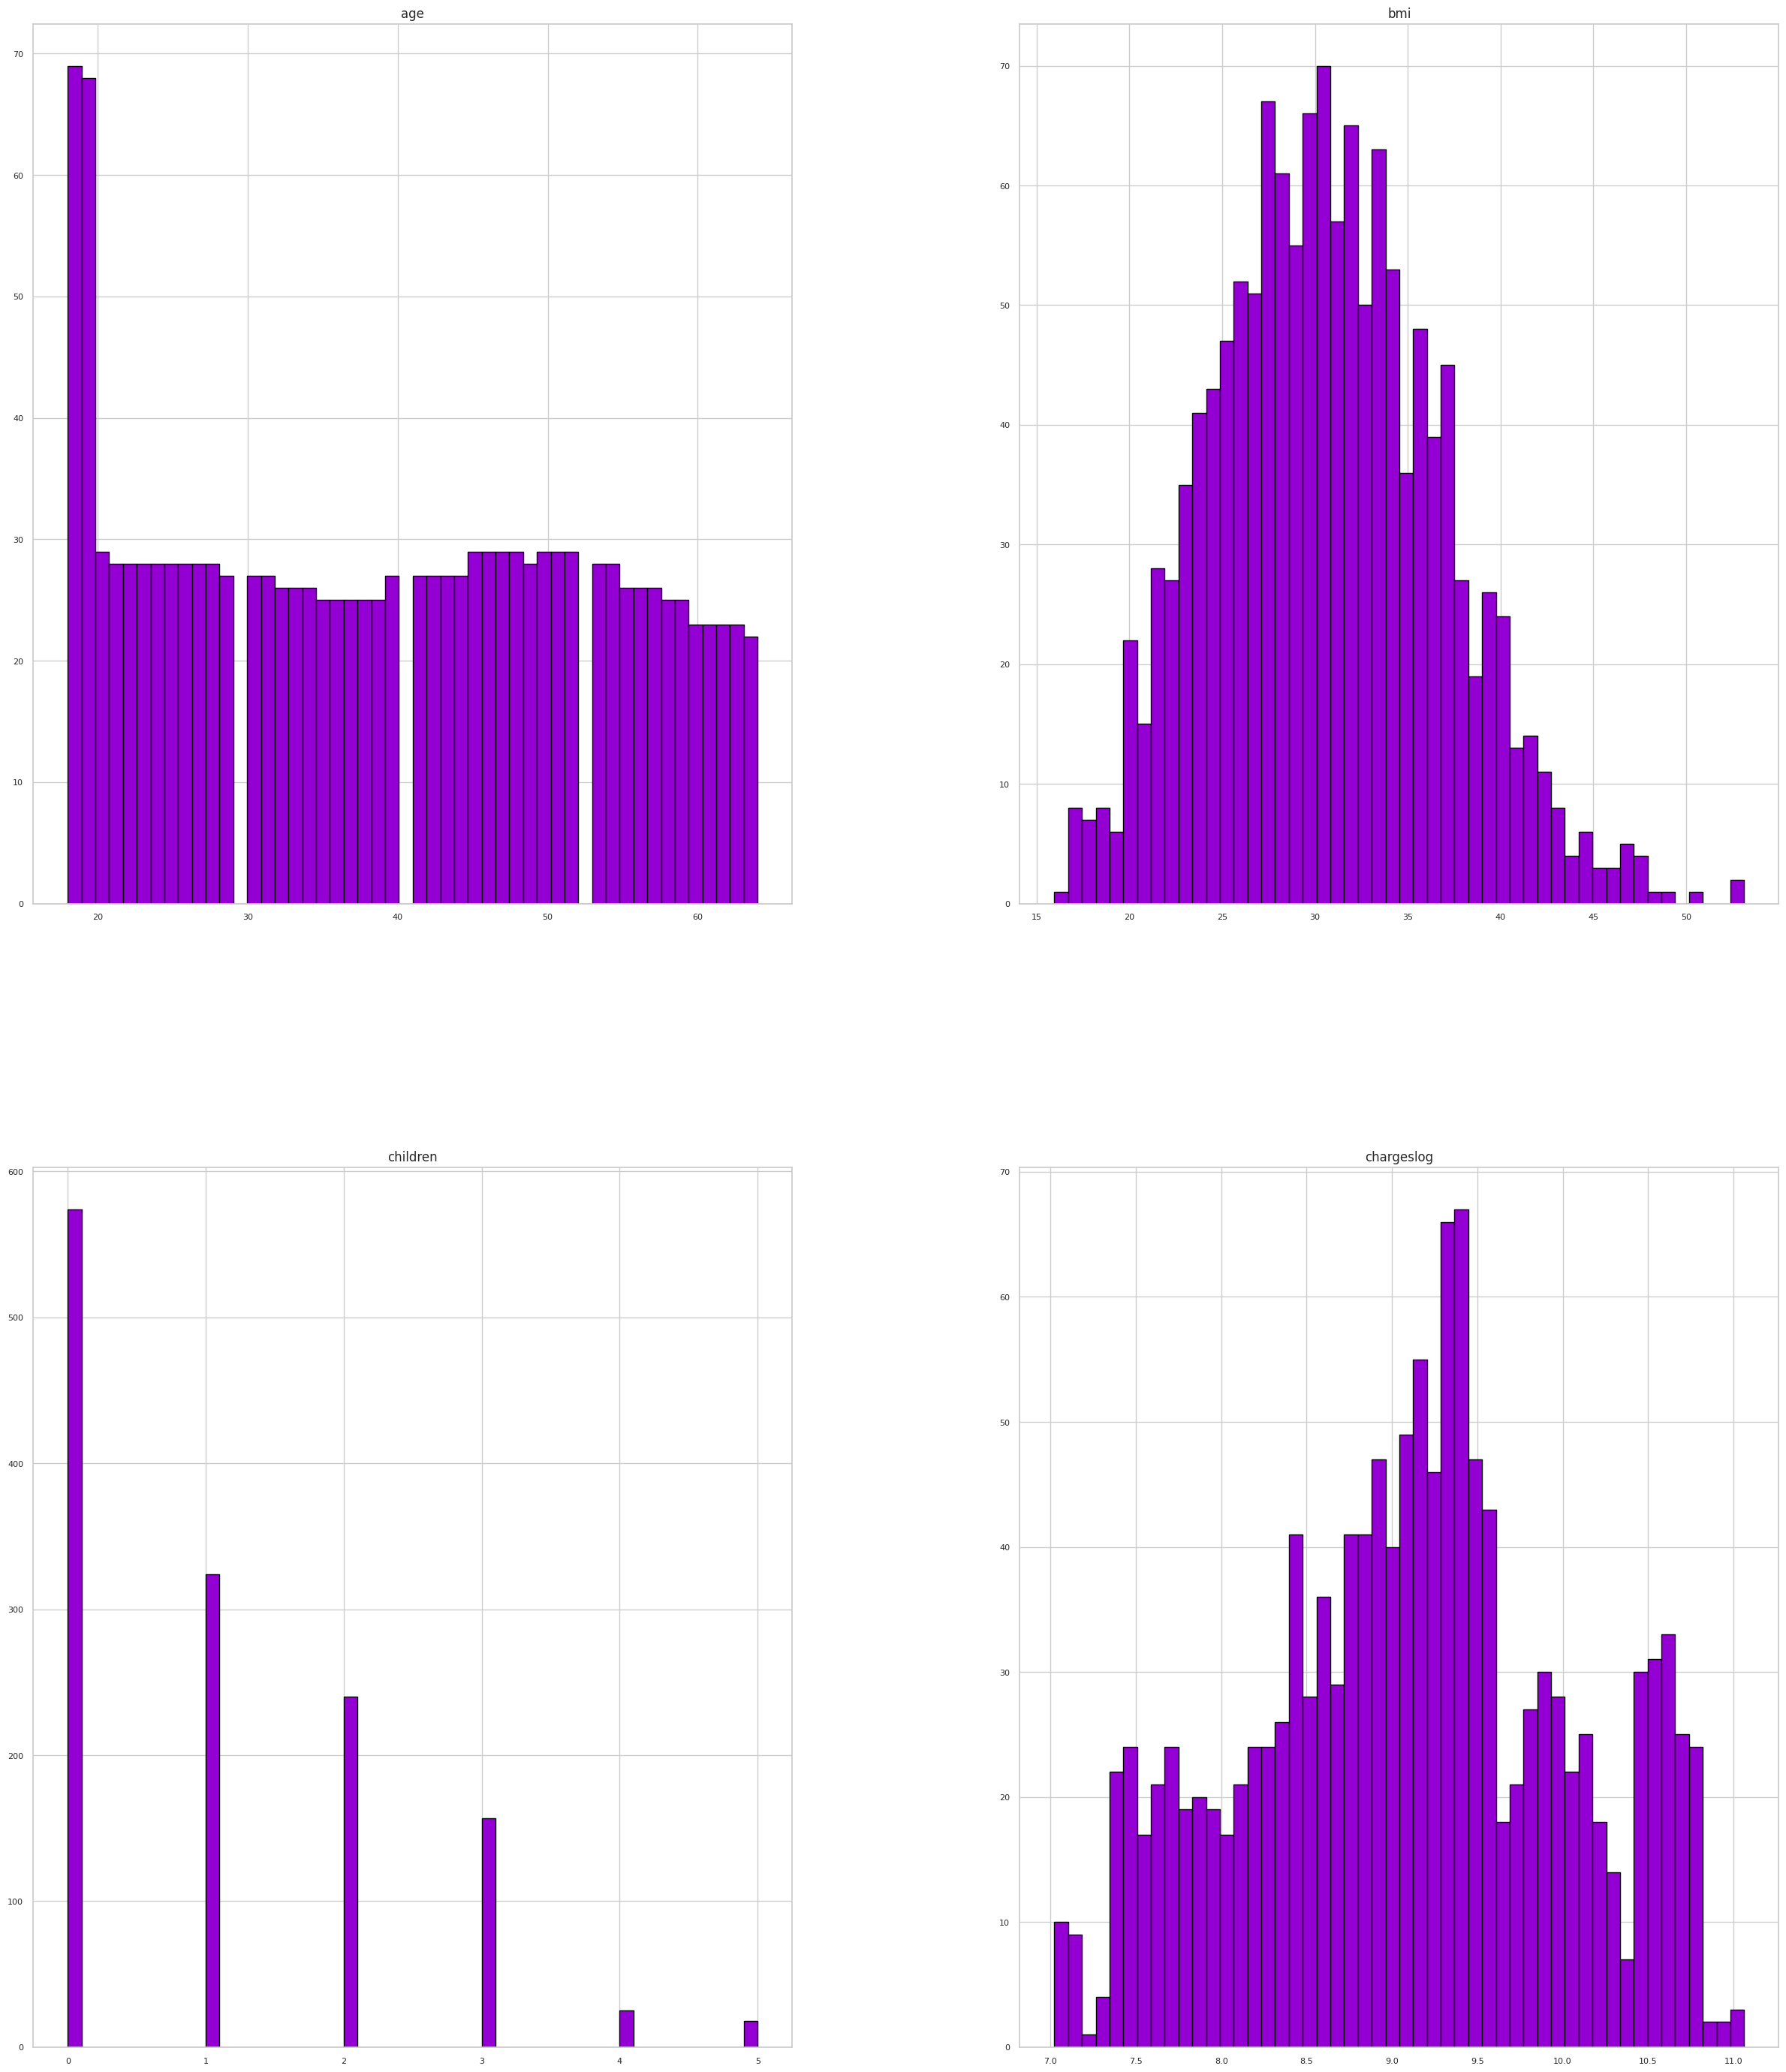

In [124]:
numerical_cols_new = [cname for cname in df_train_new.columns if
                      df_train_new[cname].dtype in ['int64', 'float64']]

df_train_new_num = df_train_new[numerical_cols_new].copy()

# Plot the distribution of all the numerical features
fig_ = df_train_new_num.hist(figsize=(30, 35), bins=50, color="darkviolet",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

Looking at the distribution of the numerical features, we notice that most of the previously skewed variables have a more normal distribution except Age and Children, which should result in better predictons.

# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> Preparing Data for Modeling </p> <font size="4">

We cannot fit and evaluate machine learning algorithms on raw data; instead, we must transform the data to meet the requirements of individual machine learning algorithms. More than that, we must choose a representation for the data that best exposes the unknown underlying structure of the prediction problem to the learning algorithms in order to get the best performance given our available resources on this predictive modeling project.

To achieve this goal, we will follow the steps below:

### <font color='forestgreen'>III.1. Split data into train and test set and Standardization

In [125]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "chargeslog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "chargeslog"]
print(y.shape)

X,y

(1338, 8)
(1338,)


(      age   bmi  children  sex_male  smoker_yes  region_northwest  \
 0      19 27.90         0         0           1                 0   
 1      18 33.77         1         1           0                 0   
 2      28 33.00         3         1           0                 0   
 3      33 22.70         0         1           0                 1   
 4      32 28.88         0         1           0                 1   
 ...   ...   ...       ...       ...         ...               ...   
 1333   50 30.97         3         1           0                 1   
 1334   18 31.92         0         0           0                 0   
 1335   18 36.85         0         0           0                 0   
 1336   21 25.80         0         0           0                 0   
 1337   61 29.07         0         0           1                 1   
 
       region_southeast  region_southwest  
 0                    0                 1  
 1                    1                 0  
 2                    1   

In [126]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train, X_test, y_train, y_test

X_train:(1070, 8)
y_train:(1070,)

X_test:(268, 8)
y_test:(268,)


(      age   bmi  children  sex_male  smoker_yes  region_northwest  \
 210    20 33.00         1         1           0                 0   
 916    43 26.89         0         0           1                 1   
 556    46 33.44         1         1           0                 0   
 1259   52 23.18         0         0           0                 0   
 328    64 33.80         1         0           1                 0   
 ...   ...   ...       ...       ...         ...               ...   
 318    44 27.64         0         0           0                 1   
 895    61 44.00         0         0           0                 0   
 1144   50 32.30         2         1           0                 0   
 130    59 26.50         0         0           0                 0   
 102    18 30.11         0         0           0                 0   
 
       region_southeast  region_southwest  
 210                  0                 1  
 916                  0                 0  
 556                  0   

In [127]:
from sklearn import preprocessing

## Non-Standardized data
X_train0 = X_train
X_test0 = X_test
y_train0 = y_train
y_test0 = y_test

# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# The output of standardization is a vector. Let's turn it into a table
# Convert X, y into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

X_train0, X_test0, y_train0, y_test0

(      age   bmi  children  sex_male  smoker_yes  region_northwest  \
 210    20 33.00         1         1           0                 0   
 916    43 26.89         0         0           1                 1   
 556    46 33.44         1         1           0                 0   
 1259   52 23.18         0         0           0                 0   
 328    64 33.80         1         0           1                 0   
 ...   ...   ...       ...       ...         ...               ...   
 318    44 27.64         0         0           0                 1   
 895    61 44.00         0         0           0                 0   
 1144   50 32.30         2         1           0                 0   
 130    59 26.50         0         0           0                 0   
 102    18 30.11         0         0           0                 0   
 
       region_southeast  region_southwest  
 210                  0                 1  
 916                  0                 0  
 556                  0   

### <font color='forestgreen'>III.2. Backward Stepwise Regression<font>

Backward Stepwise Regression is a stepwise regression approach that begins with a full (saturated) model and at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.

In [128]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : region_northwest, 0.20044197796393676 

Selected Features:
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest']


In [129]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]

### <font color='forestgreen'>III.3. Variance Inflation Factor (VIF) <font>

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

A feature with a VIF higher than 10 implies (5 is also common) that there is a multi-collinearity with the latter.

In [130]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

VIF Factor          features
0        1.00               age
1        1.10               bmi
2        1.00          children
3        1.00          sex_male
4        1.00        smoker_yes
5        1.20  region_southeast
6        1.10  region_southwest

In [131]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 5]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

None of the features have a high multicollinearity


### <font color='forestgreen'>III.4. Cook distance<font>

By calculating Cook distance we can detect influential observations in a regression model. Cook distance detects data with large residuals (outliers) that can distort the prediction and the accuracy of a regression.

In [132]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

Cook_Distance  p_value
0           0.00     1.00
1           0.00     1.00
2           0.00     1.00
3           0.00     1.00
4           0.00     1.00

In [133]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


No influencial observation detected based on Cook distance.

# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> Regression Models </p> <font size="4">

### Outlines

For this section, six supervised learning models will be considered:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regressor
* Random Forest Regressor
* XGBoost Regressor

To measure model performance and their predicitons the RMSE and R^{2} scores will be used, and 5-fold cross-validation will also be used.

### Importing Libraries

In [134]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score


### Defining Models

In [135]:
model_lin = LinearRegression()
model_ridge = Ridge(alpha = 0.001)
model_lasso = Lasso(alpha = 0.001)
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()
model_xg = XGBRegressor()

### Defining Performance Metrics

In [136]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"**** Regressor: {model} ****")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

### <font color='forestgreen'>IV.1. Linear Regression <font>

In [137]:
scores_lin = cross_val_score(model_lin, X_train, y_train,cv=5)

print("Mean scores (Linear Model):\n", np.mean(scores_lin))
print("Standard deviation of scores (Linear Model):\n", np.std(scores_lin))

Mean scores (Linear Model):
 0.7695555082020602
Standard deviation of scores (Linear Model):
 0.03756538752787835


In [139]:
scores_lin

array([0.76098242, 0.80963658, 0.81367464, 0.74861759, 0.71486631])

In [140]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

print("Intercept:\n", model_lin.intercept_)
print("Coefficients:\n", model_lin.coef_)
coef_with_intercept = np.append(model_lin.intercept_, model_lin.coef_)
print("Coefficients with intercept:\n", coef_with_intercept)

**** Regressor: Linear ****
R²: 0.7500979939432477
RMSE: 0.4520953330652597

Intercept:
 [9.08970681]
Coefficients:
 [[ 0.49313474  0.07892014  0.11886054 -0.03960717  0.63423294 -0.06411278
  -0.04762001]]
Coefficients with intercept:
 [ 9.08970681  0.49313474  0.07892014  0.11886054 -0.03960717  0.63423294
 -0.06411278 -0.04762001]


In [141]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(model_lin.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lin), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lin), 4))

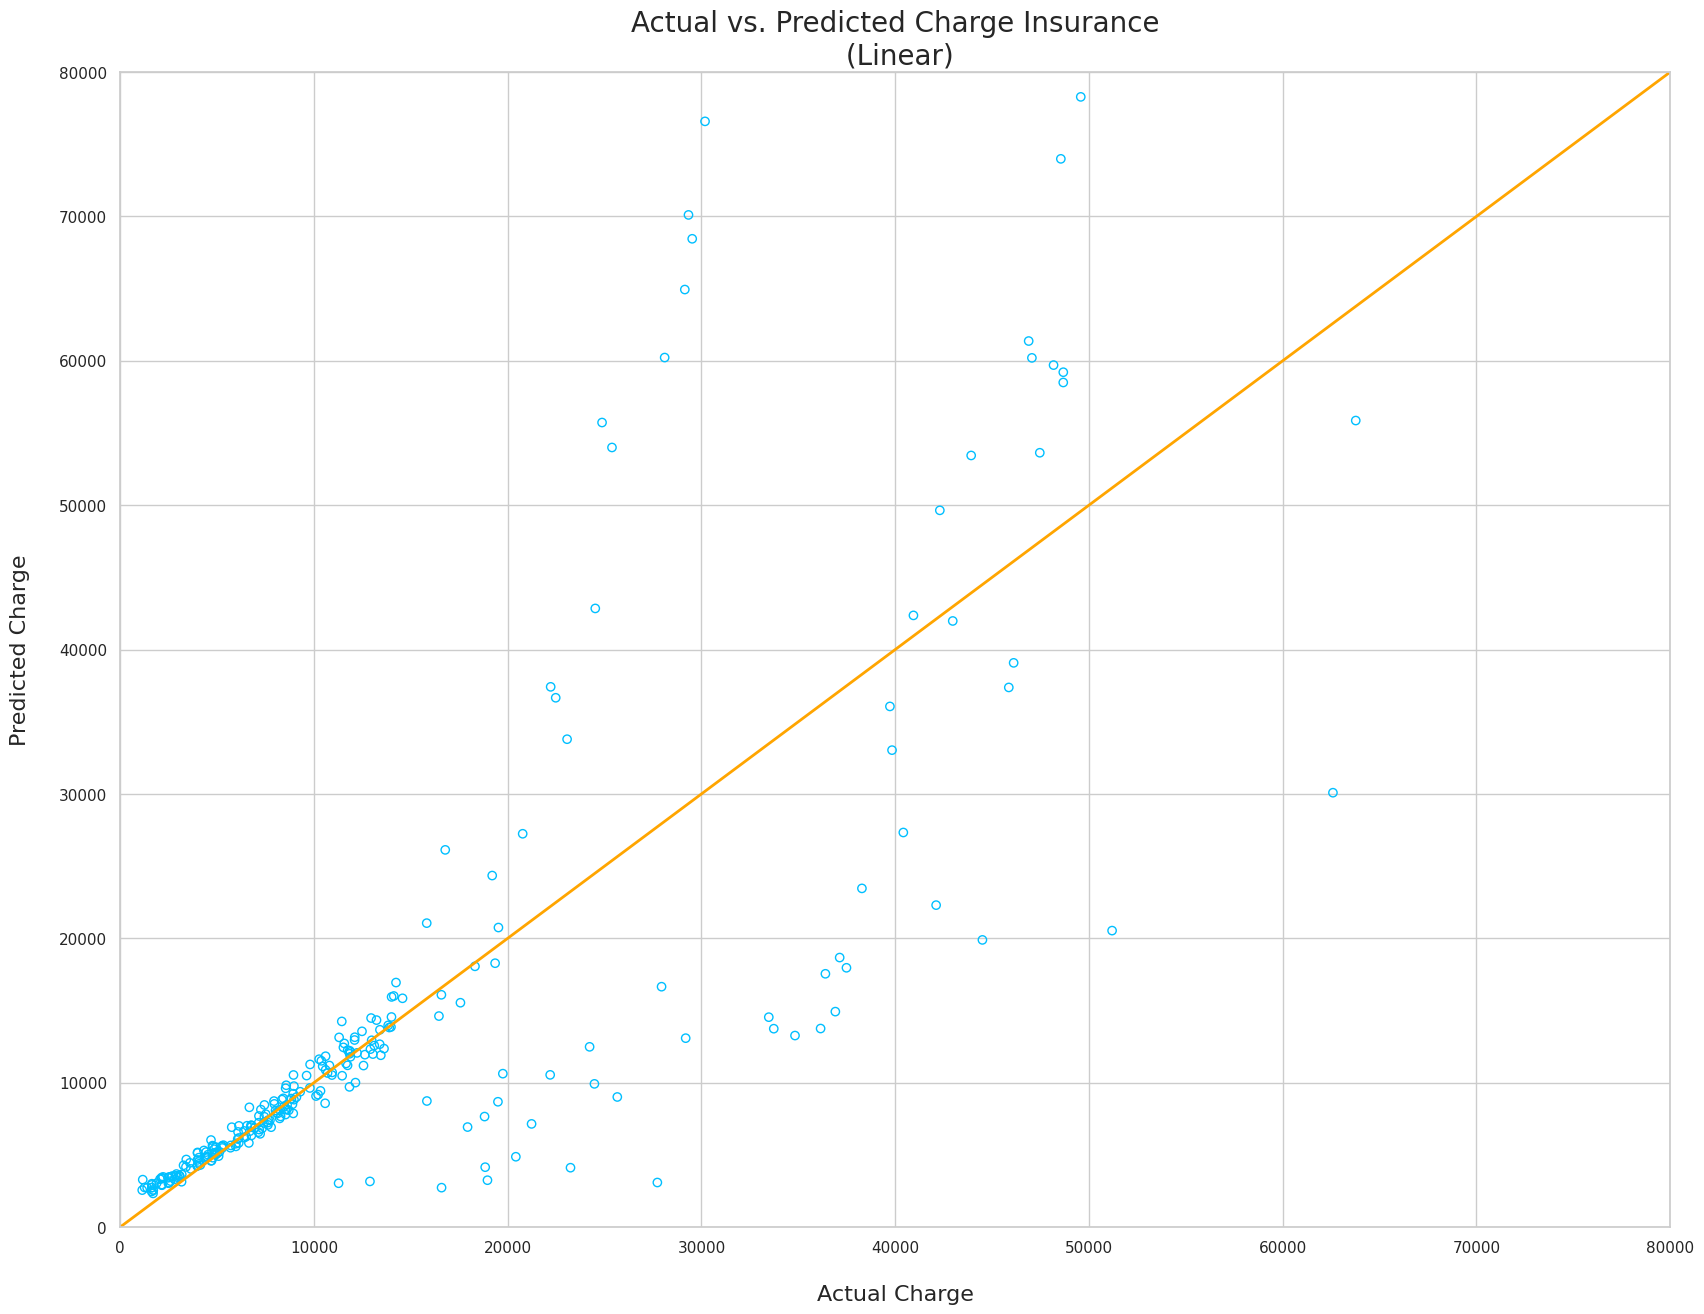

In [142]:
plt.figure()
plt.title("Actual vs. Predicted Charge Insurance\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "orange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

### <font color='forestgreen'>IV.2. Rigide Regression <font>

In [143]:
scores_ridge = cross_val_score(model_ridge, X_train, y_train,
                 cv=5)

print("Mean scores (Ridge Model):\n", np.mean(scores_ridge))
print("Standard deviation of scores (Ridge Model):\n", np.std(scores_ridge))

Mean scores (Ridge Model):
 0.7695555112505176
Standard deviation of scores (Ridge Model):
 0.037565366909470585


In [144]:
scores_ridge_mse = -1 * cross_val_score(model_ridge, X_train, y_train,
                      cv=5,
                      scoring='neg_mean_squared_error')

print("MSE scores (Ridge Model):\n", scores_ridge_mse)
print("Mean MSE scores:", scores_ridge_mse.mean())

MSE scores (Ridge Model):
 [0.19619728 0.17113553 0.14252571 0.21815815 0.25639536]
Mean MSE scores: 0.19688240623777925


In [145]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

**** Regressor: Ridge ****
R²: 0.7500980734827922
RMSE: 0.45209526111813864



In [146]:
# Save the model results into lists
model_list.append(model_ridge.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge), 4))

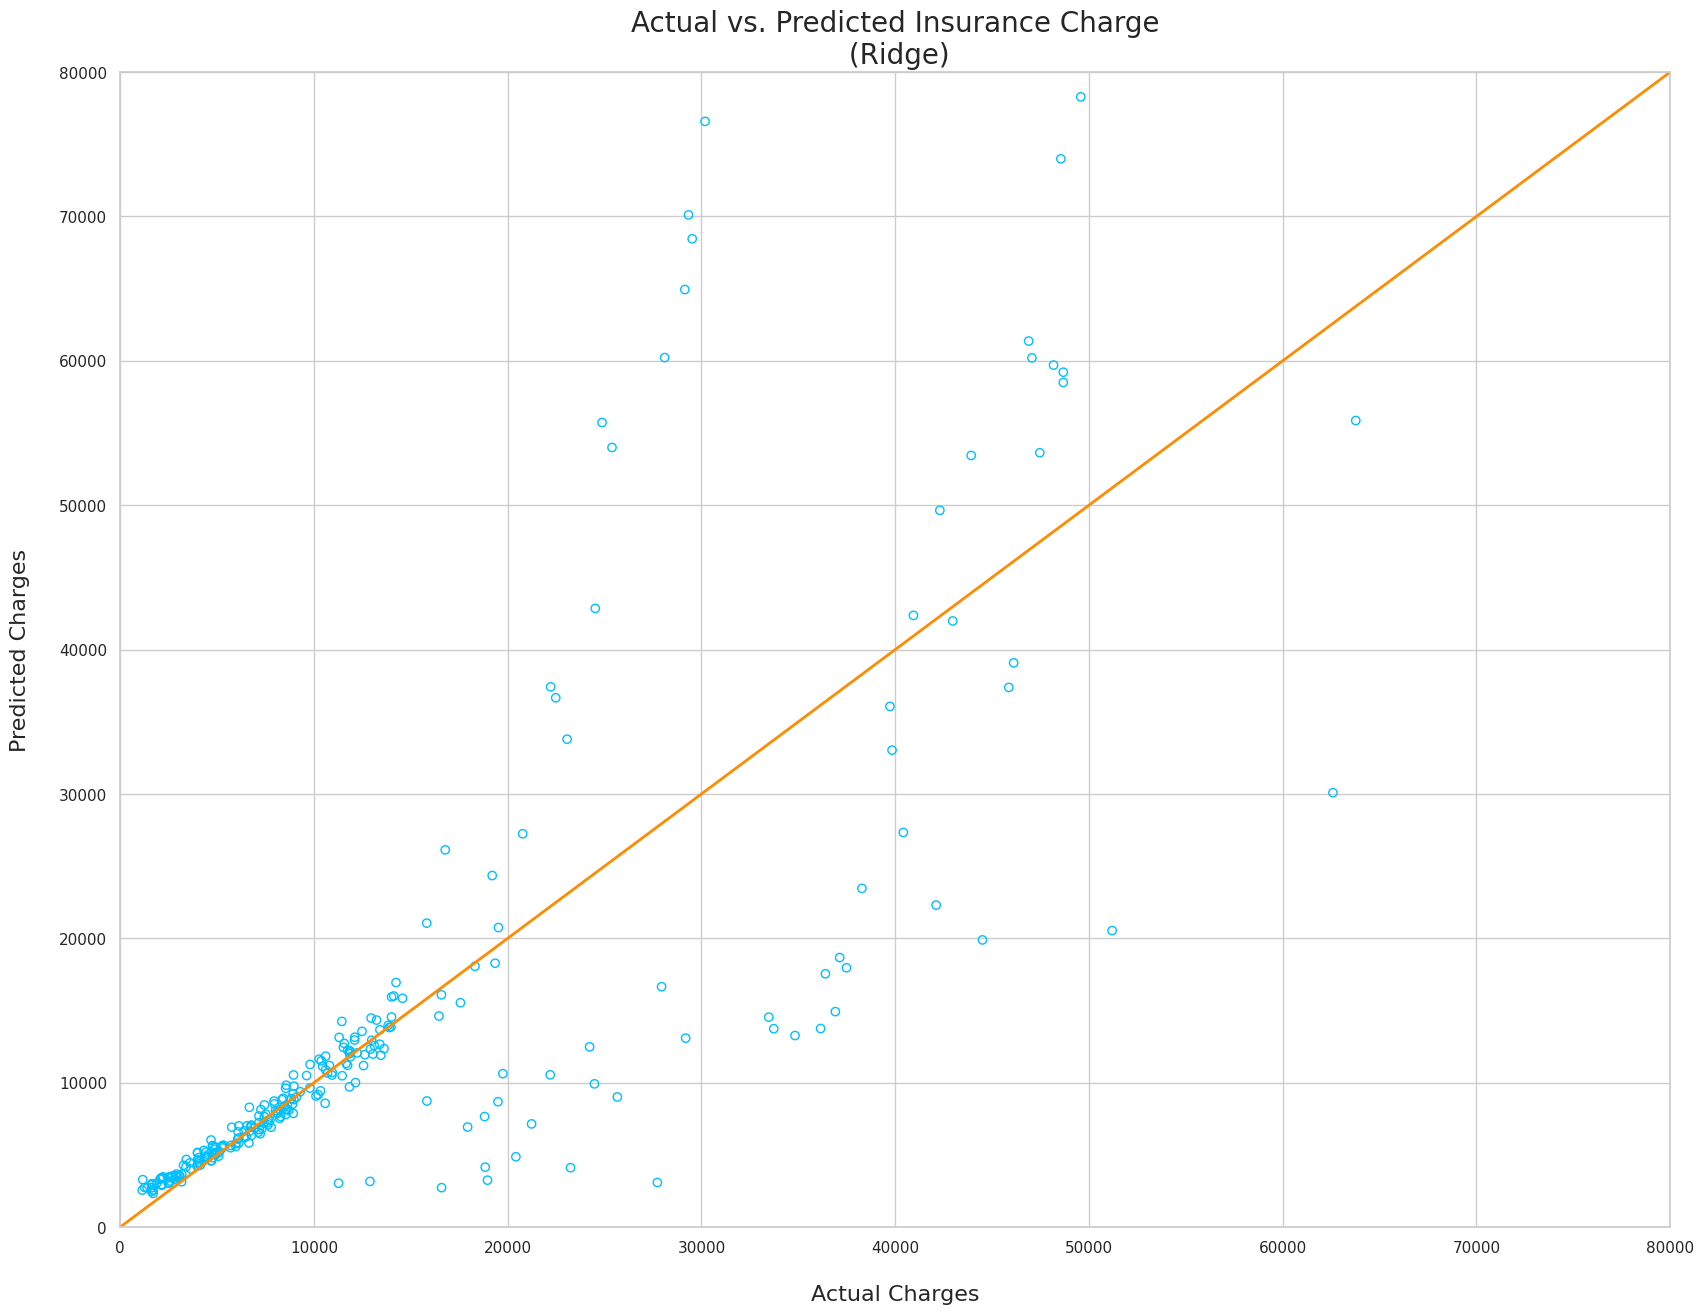

In [147]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Ridge)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charges", fontsize=16)
plt.ylabel("Predicted Charges\n", fontsize=16)
plt.show()

#### <font color='darkblue'>Hyperparamter Tuning (Ridge)</font>

In [148]:
# Define hyperparameters
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 5.656565656565657}
Best R² (train): 0.7672893173070847


In [149]:
model_ridge_opt = Ridge(alpha = ridge_cv.best_params_["alpha"])
model_ridge_opt.fit(X_train, y_train)
y_pred_ridge_opt = model_ridge_opt.predict(X_test)
print_score(y_test, y_pred_ridge_opt, "Ridge")

**** Regressor: Ridge ****
R²: 0.7505209640345154
RMSE: 0.4517125754613951



In [150]:
# Save the model results into lists
model_list.append(model_ridge_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge_opt), 4))

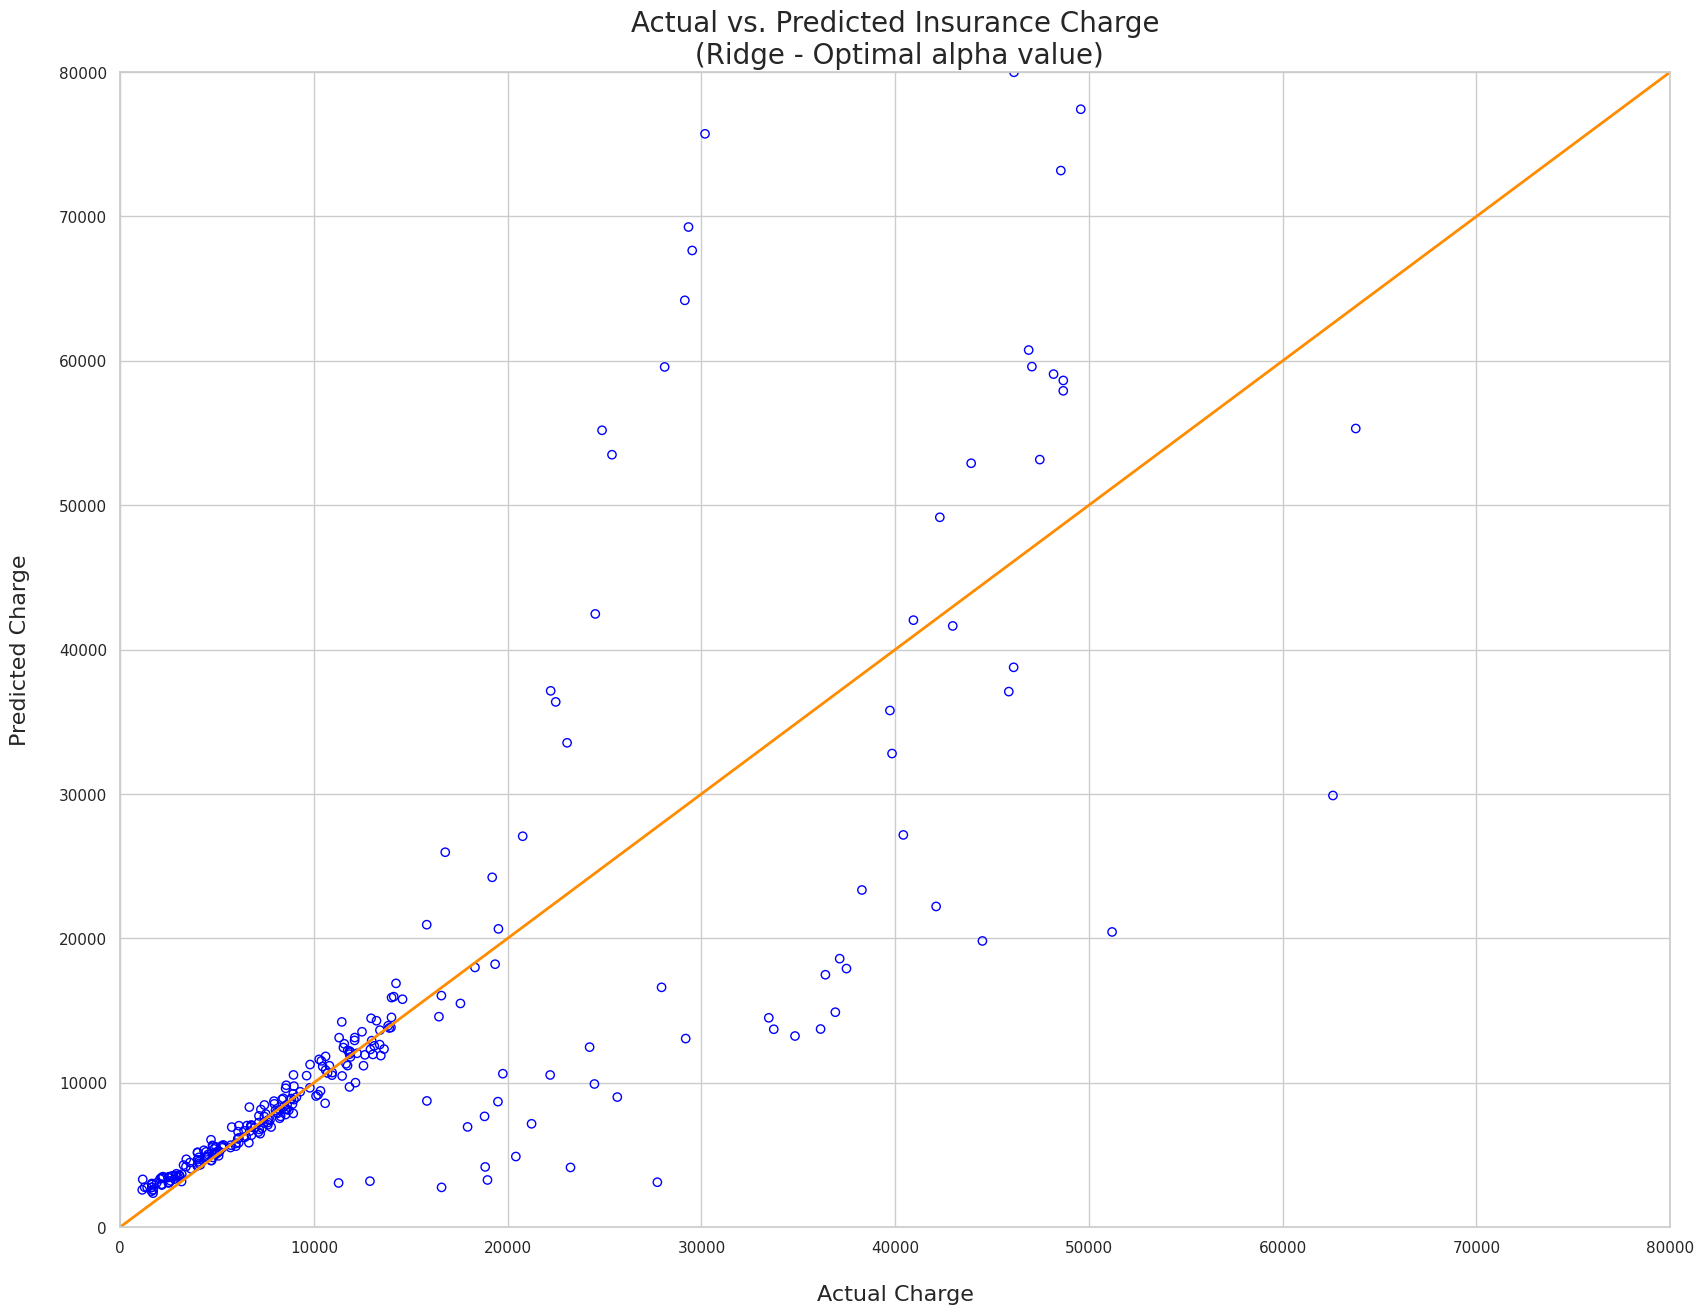

In [151]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Ridge - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

### <font color='forestgreen'> IV.3. Lasso Regression <font>

In [152]:
scores_lasso = cross_val_score(model_lasso, X_train, y_train,
                                cv=5)

print("Mean scores (Lasso Model):\n", np.mean(scores_lasso))
print("Standard deviation of scores (Lasso Model):\n", np.std(scores_lasso))

Mean scores (Lasso Model):
 0.769551985895175
Standard deviation of scores (Lasso Model):
 0.03749667208485862


In [153]:
scores_lasso_mse = -1 * cross_val_score(model_lasso, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", scores_lasso_mse)
print("Mean MSE scores:", scores_lasso_mse.mean())

MSE scores (Lasso Model):
 [0.19601778 0.171309   0.14254756 0.21823216 0.25633195]
Mean MSE scores: 0.19688769262552955


In [154]:
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, y_pred_lasso, "Lasso")

**** Regressor: Lasso ****
R²: 0.7504074757907364
RMSE: 0.45181530601346626



In [155]:
# Save the model results into lists
model_list.append(model_lasso.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso), 4))

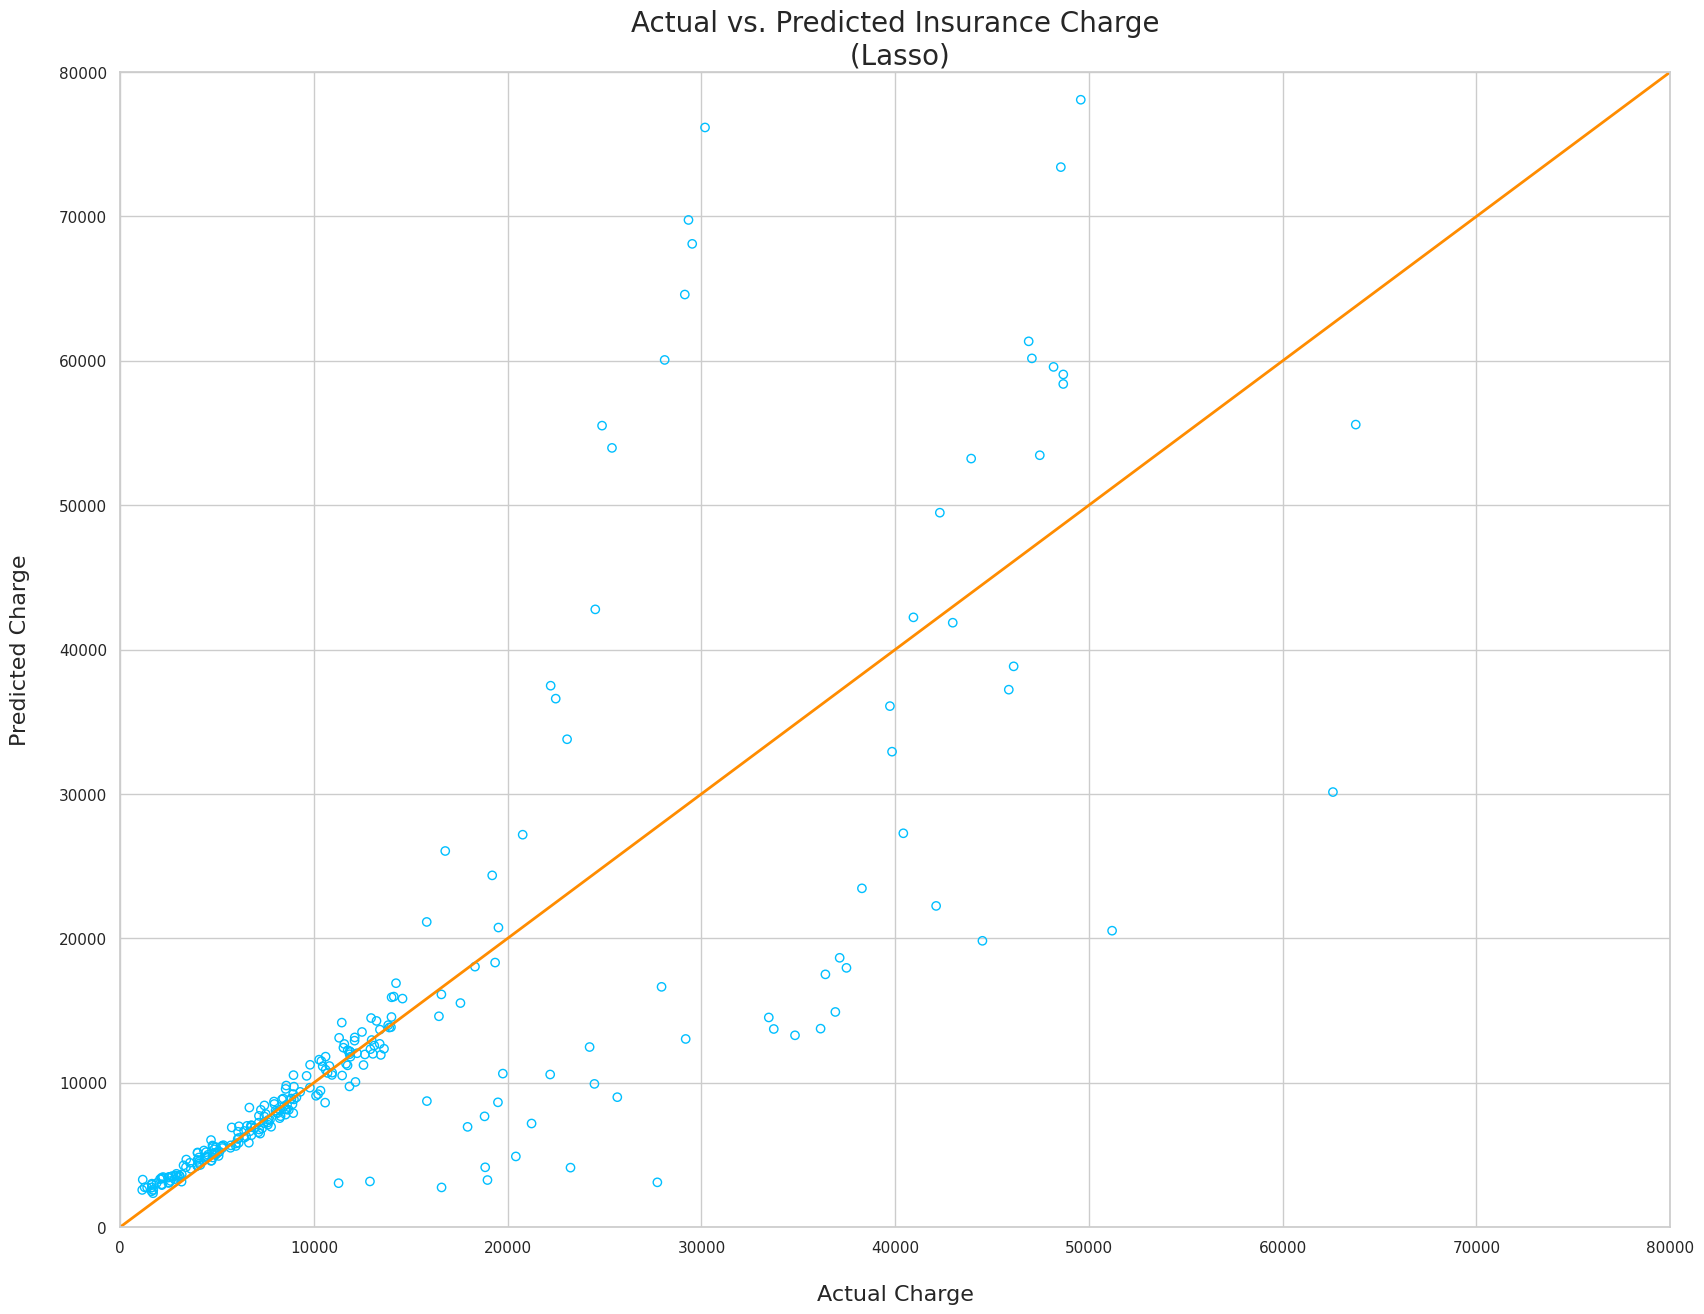

In [156]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Lasso)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

#### <font color='darkblue'>Hyperparamter Tuning (Lasso)</font>

In [157]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 0.0008302175681319744}
Best R² (train): 0.7672675455800415


In [158]:
model_lasso_opt = Lasso(alpha = lasso_cv.best_params_["alpha"])

model_lasso_opt.fit(X_train, y_train)
y_pred_lasso_opt = model_lasso_opt.predict(X_test)
print_score(y_test, y_pred_lasso_opt, "Lasso")

**** Regressor: Lasso ****
R²: 0.7503560179789539
RMSE: 0.451861878379479



In [159]:
# Save the model results into lists
model_list.append(model_lasso_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso_opt), 4))

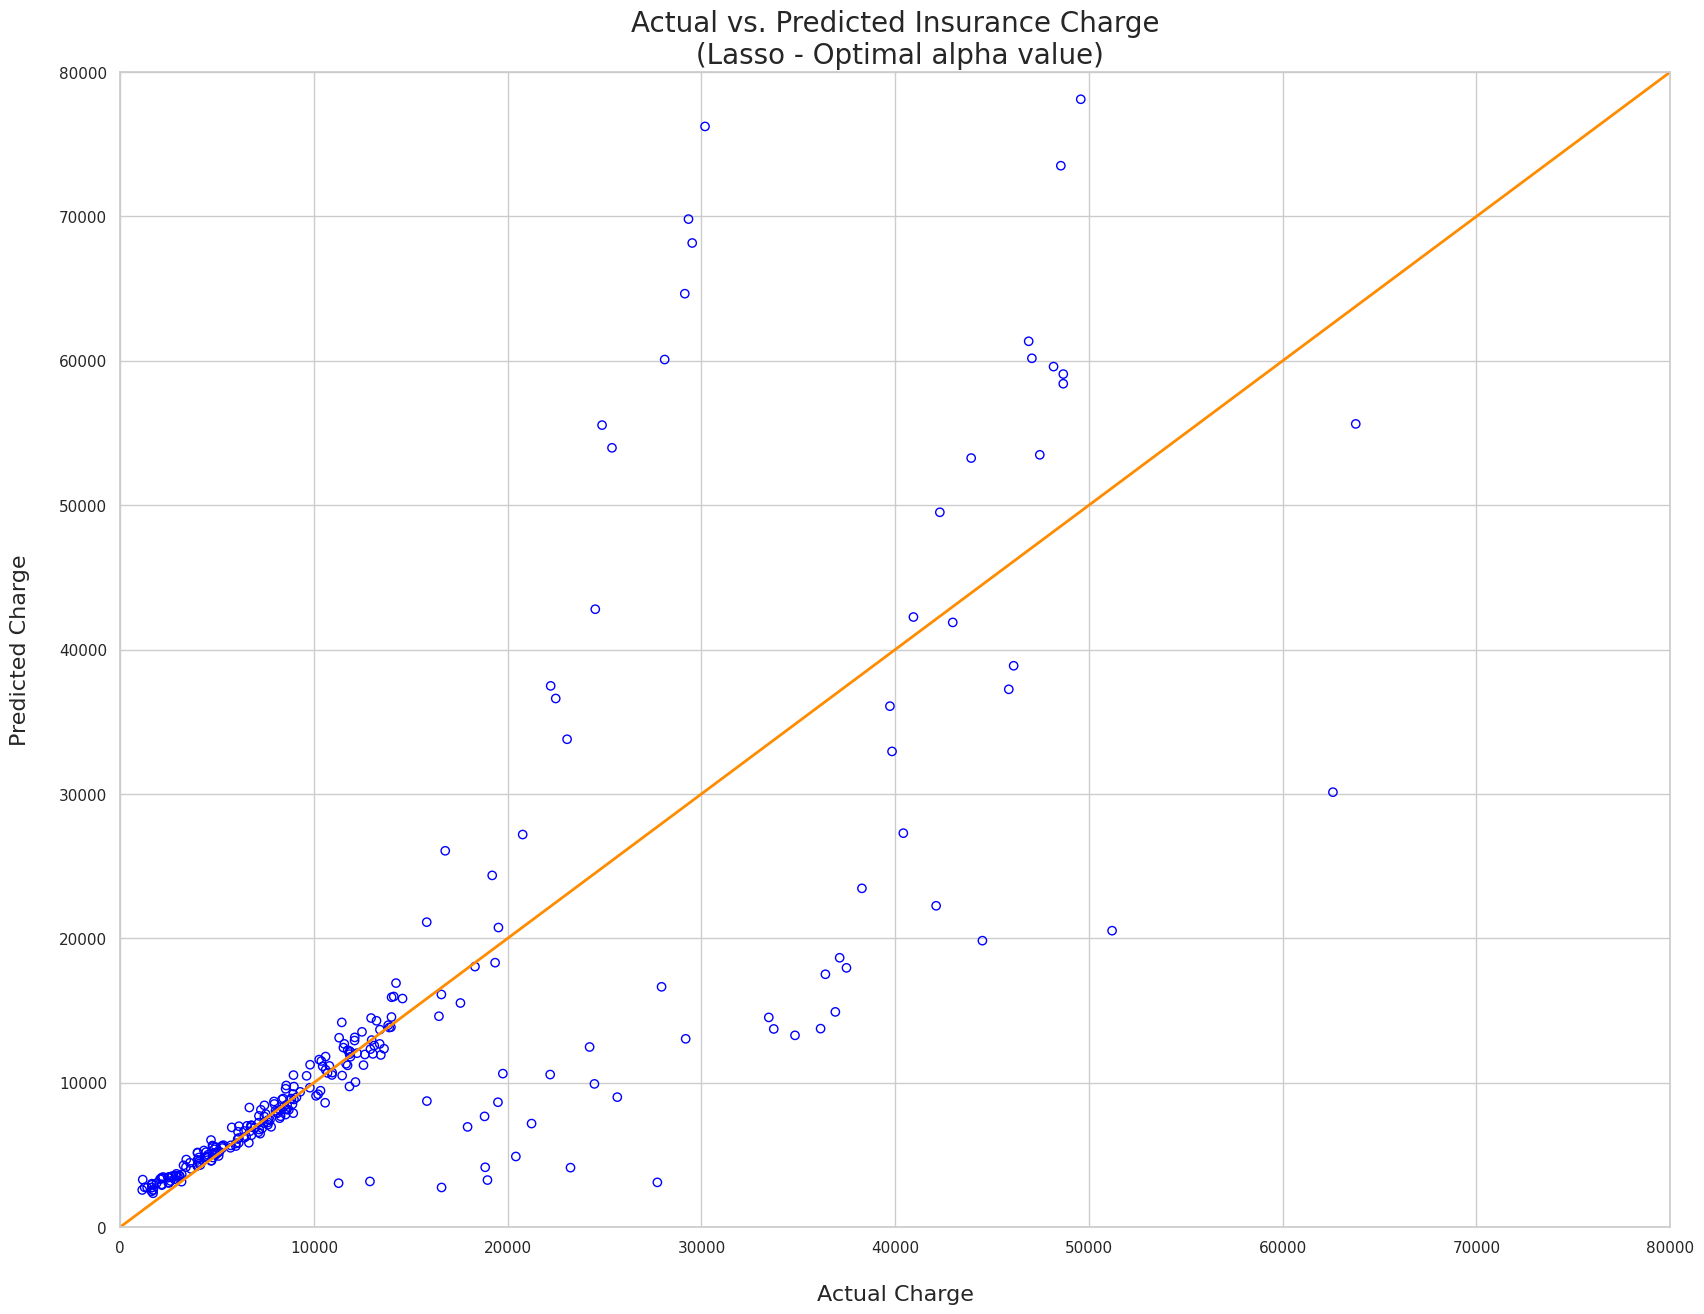

In [160]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Lasso - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

### <font color='forestgreen'> IV.4. Random Forest Regressor <font>

In [161]:
scores_ran = cross_val_score(model_ran, X_train, y_train,
                            cv=5)

print("Mean scores (Random Forest Model):\n", np.mean(scores_ran))
print("Standard deviation of scores (Random Forest Model):\n", np.std(scores_ran))

Mean scores (Random Forest Model):
 0.8003575490647096
Standard deviation of scores (Random Forest Model):
 0.034847562265837136


In [162]:
scores_ran_mse = -1 * cross_val_score(model_ran, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Random Forest Model):\n", scores_ran_mse)
print("Mean MSE scores:", scores_ran_mse.mean())

MSE scores (Random Forest Model):
 [0.17590409 0.12392413 0.14070423 0.18538626 0.2181797 ]
Mean MSE scores: 0.16881968053076257


In [163]:
model_ran.fit(X_train, y_train)
y_pred_ran = model_ran.predict(X_test)
print_score(y_test, y_pred_ran, "Random Forest")

**** Regressor: Random Forest ****
R²: 0.7766931609430694
RMSE: 0.42736225743468603



In [164]:
# Save the model results into lists
model_list.append(model_ran.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ran), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ran), 4))

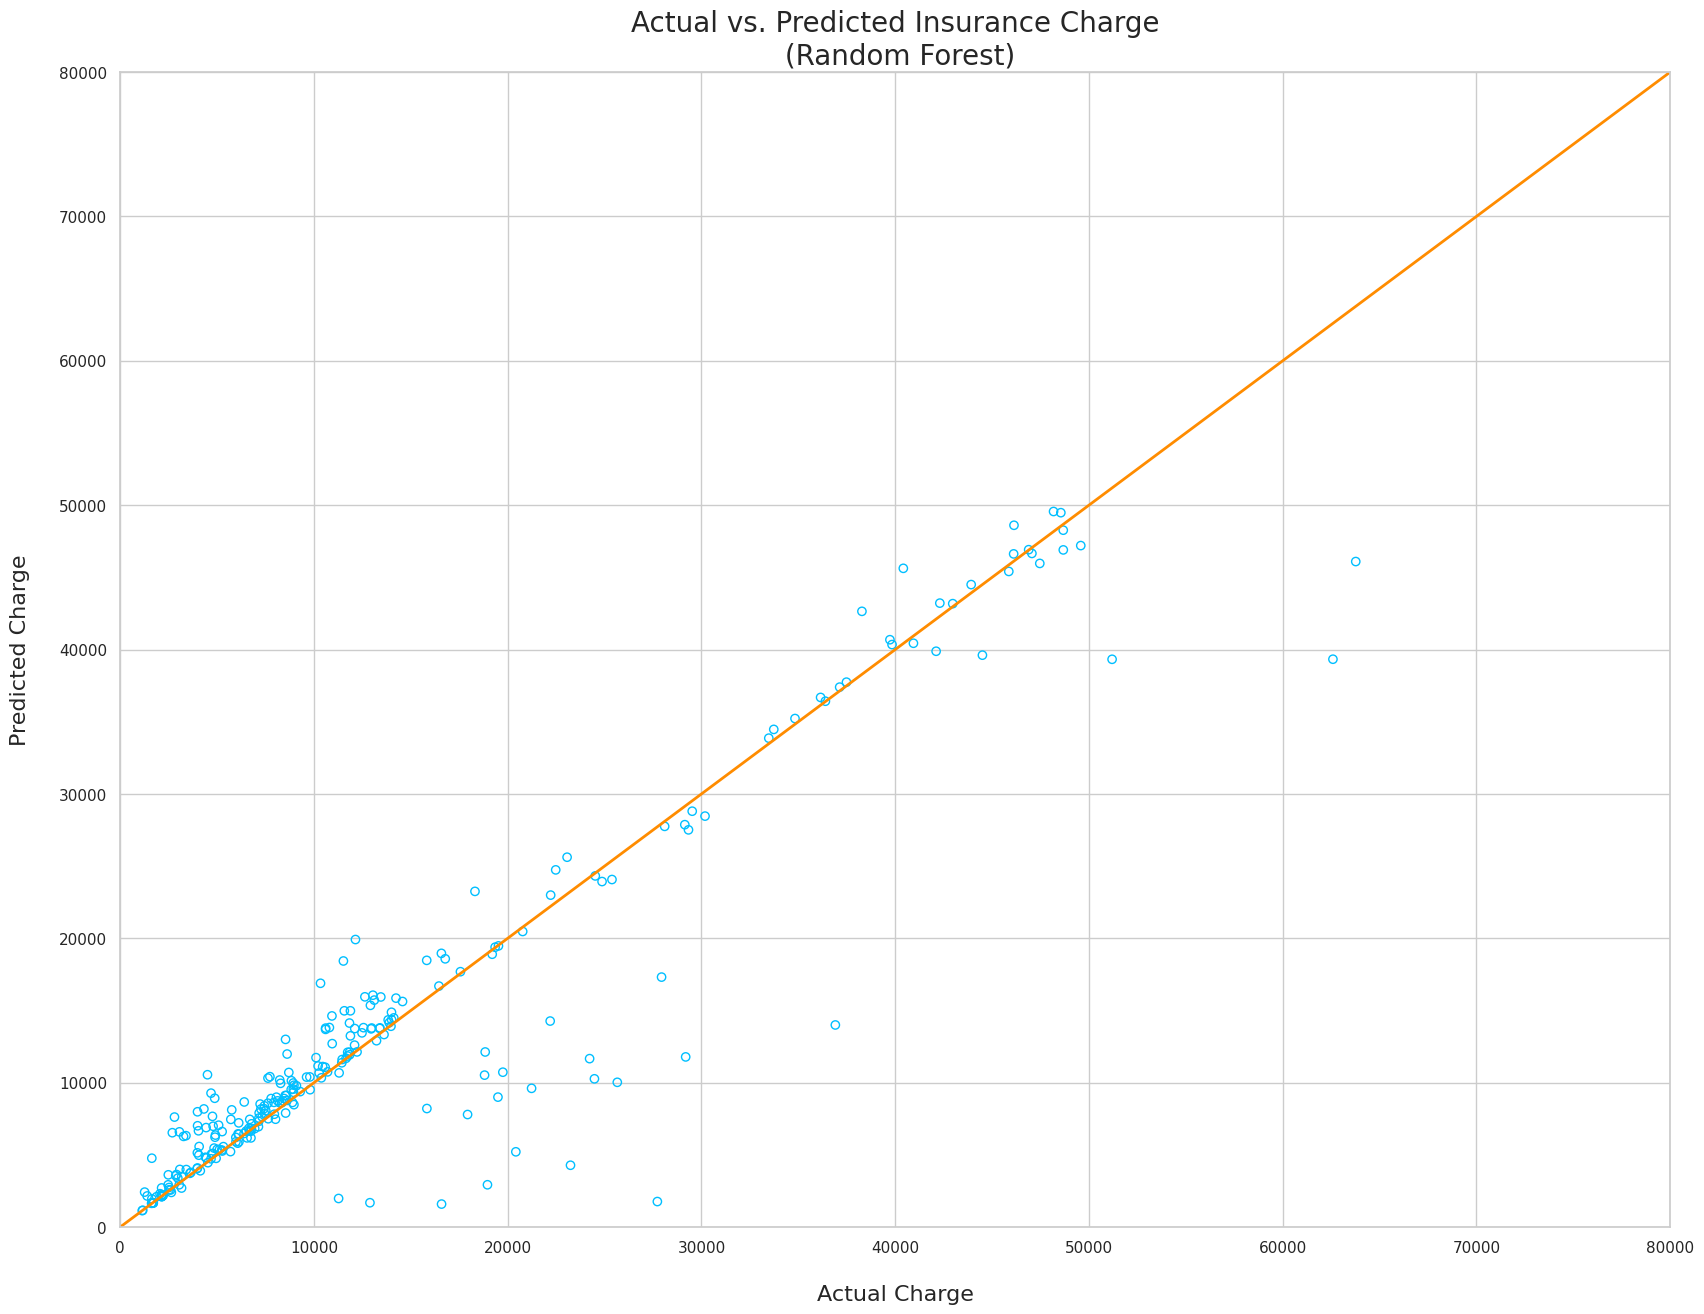

In [165]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Random Forest)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ran),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

 ### <font color='forestgreen'> IV.5. XGBoost Regression <font>

In [166]:
# Define hyperparameters
tuned_parameters_xgb = {"max_depth": [3],
                        "colsample_bytree": [0.3, 0.7],
                        "learning_rate": [0.01, 0.05, 0.1],
                        "n_estimators": [100, 500, 1000]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters_xgb,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

Best R²: 0.8400165342679898


In [167]:
model_xgb_opt = XGBRegressor(colsample_bytree = xgbr_cv.best_params_["colsample_bytree"],
                             learning_rate = xgbr_cv.best_params_["learning_rate"],
                             max_depth = xgbr_cv.best_params_["max_depth"],
                             n_estimators = xgbr_cv.best_params_["n_estimators"])

model_xgb_opt.fit(X_train, y_train)
y_pred_xgb_opt = model_xgb_opt.predict(X_test)
print_score(y_test, y_pred_xgb_opt, "XGBoost")

**** Regressor: XGBoost ****
R²: 0.8091342002338815
RMSE: 0.39510198437413435



In [168]:
# Save the model results into lists
model_list.append(model_xgb_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_xgb_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_xgb_opt), 4))

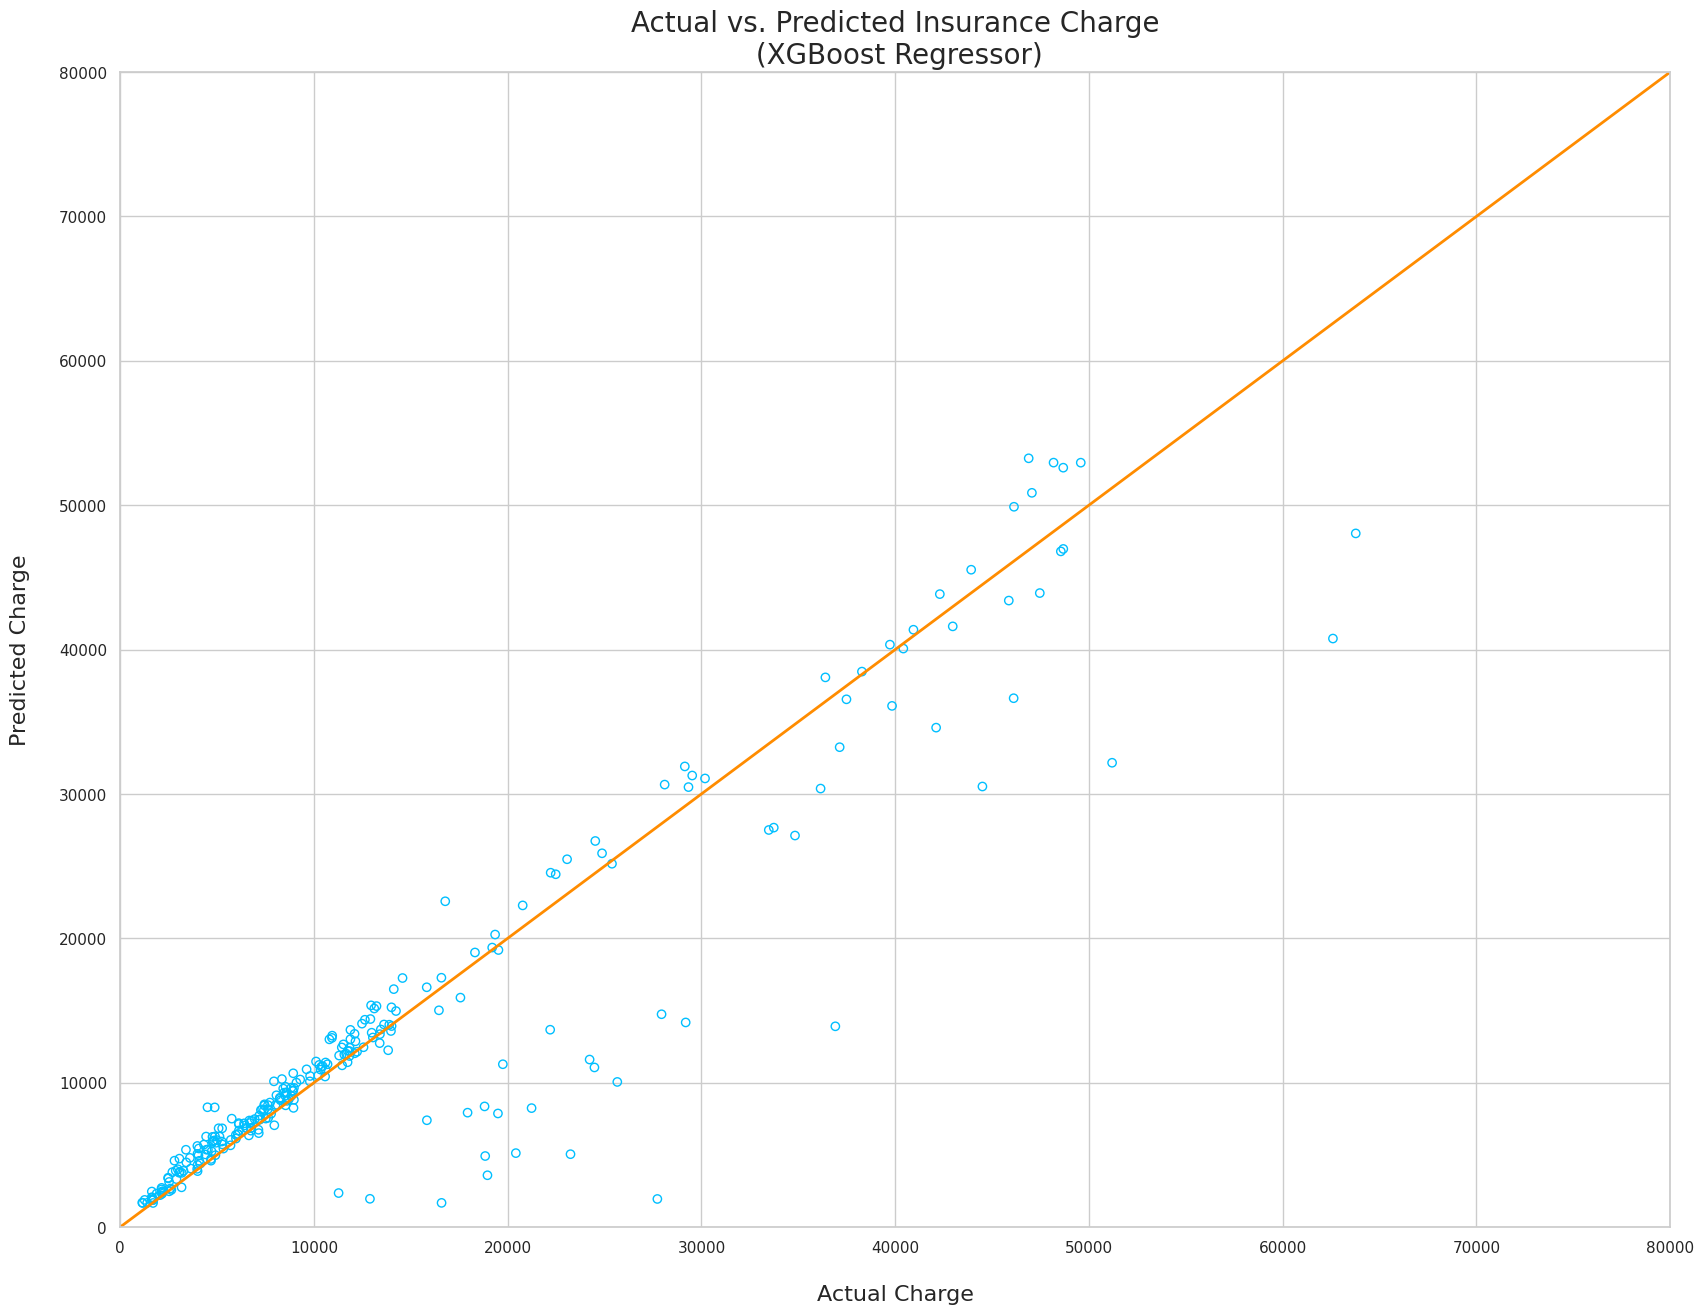

In [169]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (XGBoost Regressor)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_opt),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

In [170]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

Model   R²  RMSE
0       LinearRegression 0.75  0.45
1                  Ridge 0.75  0.45
2                  Ridge 0.75  0.45
3                  Lasso 0.75  0.45
4                  Lasso 0.75  0.45
5  RandomForestRegressor 0.78  0.43
6           XGBRegressor 0.81  0.40

The results of this modeling are showing that the best performance in terms of R squared (R²) correspond to XGB Regressor. With regards to Residual Mean Square Error (RMSE), all these models are doing well except XGB Regressor which achieved a better performance.

Thus, XGB Regressor will be chosen to make prediction on futur observations.

# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> MCMC for Linear Regression Models </p> <font size="4">

<p style="background-color:;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> Simple Linear Regression <span style='font-size:28px; background-color:blue ;'>  </span></p>

This code conducts a Bayesian linear regression analysis on the dataset to predict medical charges based on patients' body mass index (BMI). It begins by importing essential libraries, including NumPy, Pandas, PyMC3, ArviZ, and StatsModels. The code defines a function called linear_regression(), specifying a PyMC3 linear regression model with normal priors for intercept and slope parameters and a normal likelihood. This function takes predictor (BMI) and response (charges) variables as arguments.

After importing the medical charges data, the code splits it into training and test sets based on BMI. The first 100 rows are designated as the training set, while the remaining rows constitute the test set. The function is then applied to the training set to fit the model and generate posterior samples using Markov chain Monte Carlo (MCMC) sampling. Posterior trace and density plots are created using ArviZ. Subsequently, the code calculates the mean squared error (MSE) by predicting charges on the test set and comparing the results with actual charges, providing insights into model performance. The MSE is then displayed in the console output.

In [171]:
#!pip install pymc3


In [172]:
pip install pymc

In [173]:
import pymc as pm

Mean squared error: 0.79


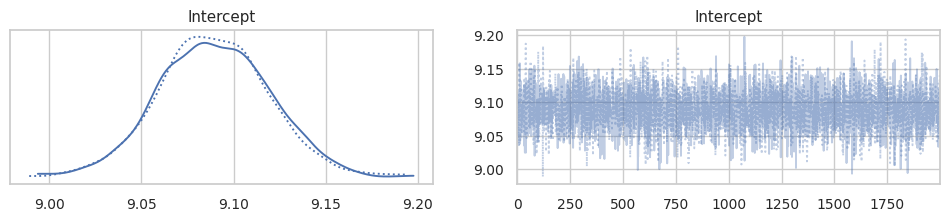

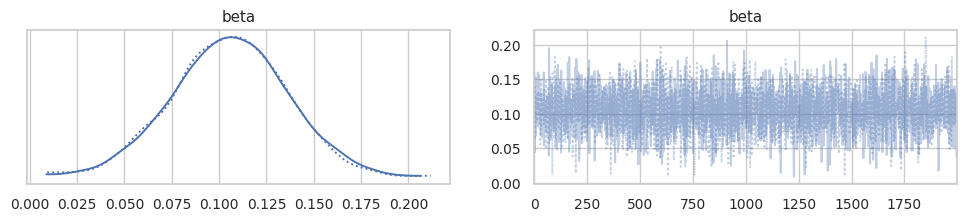

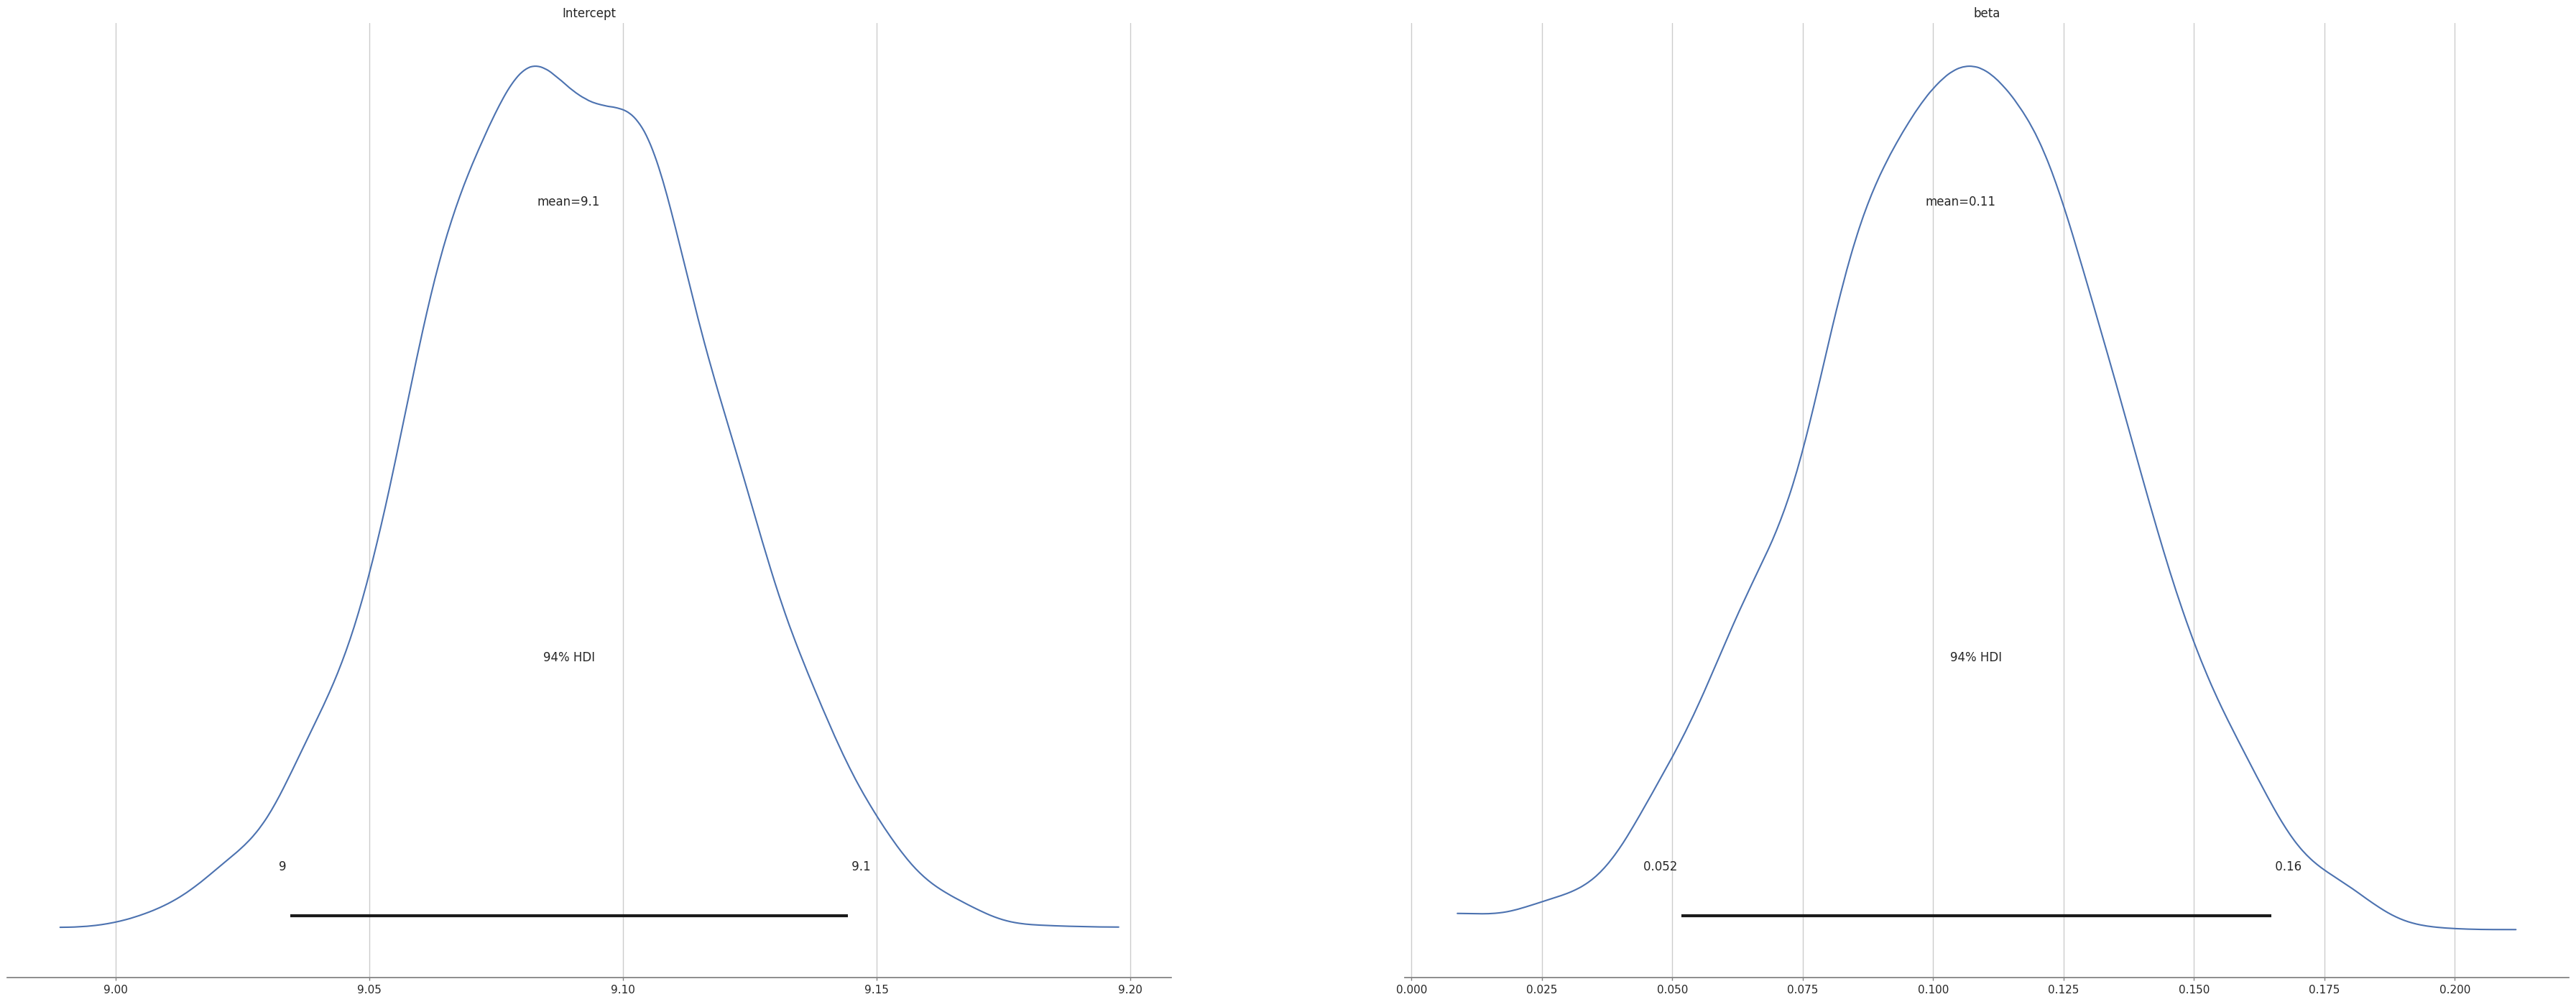

In [174]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
from scipy.optimize import minimize
import statsmodels.api as sm

# Define the model
def linear_regression(x, y):
    with pm.Model() as model:
        # Priors
        intercept = pm.Normal("Intercept", mu=0, sigma=10)
        beta = pm.Normal("beta", mu=0, sigma=10)

        # Likelihood
        likelihood = pm.Normal("y", mu=intercept + beta * x, sigma=1, observed=y)

        # Sampling
        trace = pm.sample(2000, chains=2, cores=2)
    return trace

# Split the data
x1_train = X_train['bmi']
y1_train = y_train['chargeslog']
x1_test = X_test['bmi']
y1_test = y_test['chargeslog']

# Fit the model
trace = linear_regression(x1_train, y1_train)

# Posterior plots
az.plot_trace(trace["posterior"]['Intercept'])
az.plot_trace(trace["posterior"]['beta'])
az.plot_posterior(trace)

# Predict on the test set
intercept = np.mean(trace['posterior']['Intercept'].data)
beta = np.mean(trace['posterior']["beta"].data)
y_pred = intercept + beta * x1_test

# Mean squared error
mse = np.mean((y_pred - y1_test) ** 2)
print(f"Mean squared error: {mse:.2f}")

In [175]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [176]:
trace['posterior']['Intercept'].data

array([[9.05894578, 9.08542933, 9.07409134, ..., 9.06405352, 9.07380446,
        9.09973341],
       [9.05307242, 9.10812686, 9.09937216, ..., 9.10540961, 9.14002977,
        9.08372324]])

In [177]:
beta.data * x1_test

0      0.04
1      0.10
2     -0.04
3      0.11
4     -0.13
       ... 
263    0.01
264   -0.05
265   -0.02
266    0.14
267   -0.13
Name: bmi, Length: 268, dtype: float64

In [178]:
x1_test

0      0.40
1      0.91
2     -0.38
3      1.00
4     -1.23
       ... 
263    0.12
264   -0.52
265   -0.19
266    1.30
267   -1.27
Name: bmi, Length: 268, dtype: float64

In [179]:
trace['posterior']['Intercept']

<xarray.DataArray 'Intercept' (chain: 2, draw: 2000)>
array([[9.05894578, 9.08542933, 9.07409134, ..., 9.06405352, 9.07380446,
        9.09973341],
       [9.05307242, 9.10812686, 9.09937216, ..., 9.10540961, 9.14002977,
        9.08372324]])
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

In [180]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [181]:
x1_train, y_train, y_pred

(0       0.40
 1      -0.62
 2       0.47
 3      -1.24
 4       0.53
         ... 
 1065   -0.49
 1066    2.23
 1067    0.28
 1068   -0.68
 1069   -0.08
 Name: bmi, Length: 1070, dtype: float64,
       chargeslog
 0           7.59
 1           9.99
 2           9.03
 3           9.23
 4          10.78
 ...          ...
 1065        8.91
 1066        9.48
 1067        9.17
 1068        9.46
 1069        9.97
 
 [1070 rows x 1 columns],
 0     9.13
 1     9.19
 2     9.05
 3     9.19
 4     8.96
       ... 
 263   9.10
 264   9.03
 265   9.07
 266   9.23
 267   8.96
 Name: bmi, Length: 268, dtype: float64)

In [182]:
y_train

chargeslog
0           7.59
1           9.99
2           9.03
3           9.23
4          10.78
...          ...
1065        8.91
1066        9.48
1067        9.17
1068        9.46
1069        9.97

[1070 rows x 1 columns]

In [183]:
y_train['chargeslog']

0       7.59
1       9.99
2       9.03
3       9.23
4      10.78
        ... 
1065    8.91
1066    9.48
1067    9.17
1068    9.46
1069    9.97
Name: chargeslog, Length: 1070, dtype: float64

In [184]:
pred_table = pd.DataFrame({'train_x': x1_train, 'y_train': y_train['chargeslog'], 'y_pred': y_pred})
pred_table.head(10)

train_x  y_train  y_pred
0     0.40     7.59    9.13
1    -0.62     9.99    9.19
2     0.47     9.03    9.05
3    -1.24     9.23    9.19
4     0.53    10.78    8.96
5    -1.80     9.75    9.04
6    -2.23     9.58    9.32
7    -0.84     7.71    9.07
8     1.41     9.38    9.12
9    -0.56    10.02    9.11

### Interpretation:

* The trace plot on the left shows the sampled values of the parameters for each iteration of the MCMC algorithm, which are useful for diagnosing issues with the convergence of the algorithm. Ideally, the trace plots should look like a random walk, with no apparent trends or patterns. In this case, the trace plots show a good convergence, with the chains exploring the parameter space well.

* The posterior plot on the right shows the posterior distribution of the parameters, which is the distribution of values that the parameters could take, given the data and the model. The thicker line represents the median of the distribution, and the dashed lines represent the 95% credible interval, which is the range of values that contains 95% of the probability density. In this case, we can see that the intercept has a narrow distribution around 6, and the slope (beta) has a wider distribution around 0.2.

<p style="background-color:;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> Multiple Linear Regression <span style='font-size:28px; background-color:blue ;'>  </span></p>

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'beta\n1'}>,
        <Axes: title={'center': 'beta\n2'}>],
       [<Axes: title={'center': 'beta\n3'}>,
        <Axes: title={'center': 'beta\n4'}>,
        <Axes: title={'center': 'beta\n5'}>,
        <Axes: title={'center': 'beta\n6'}>]], dtype=object)

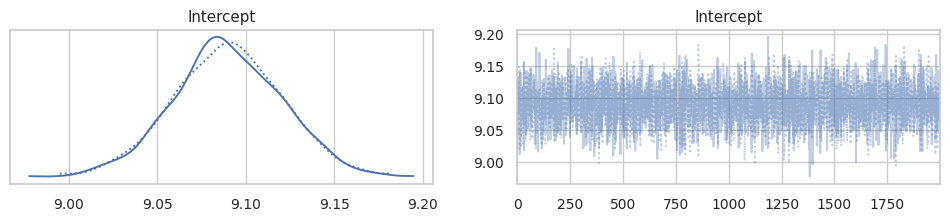

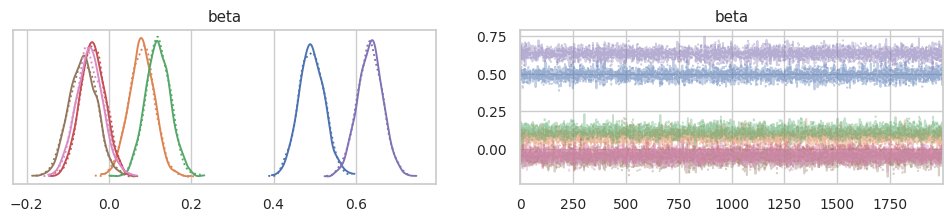

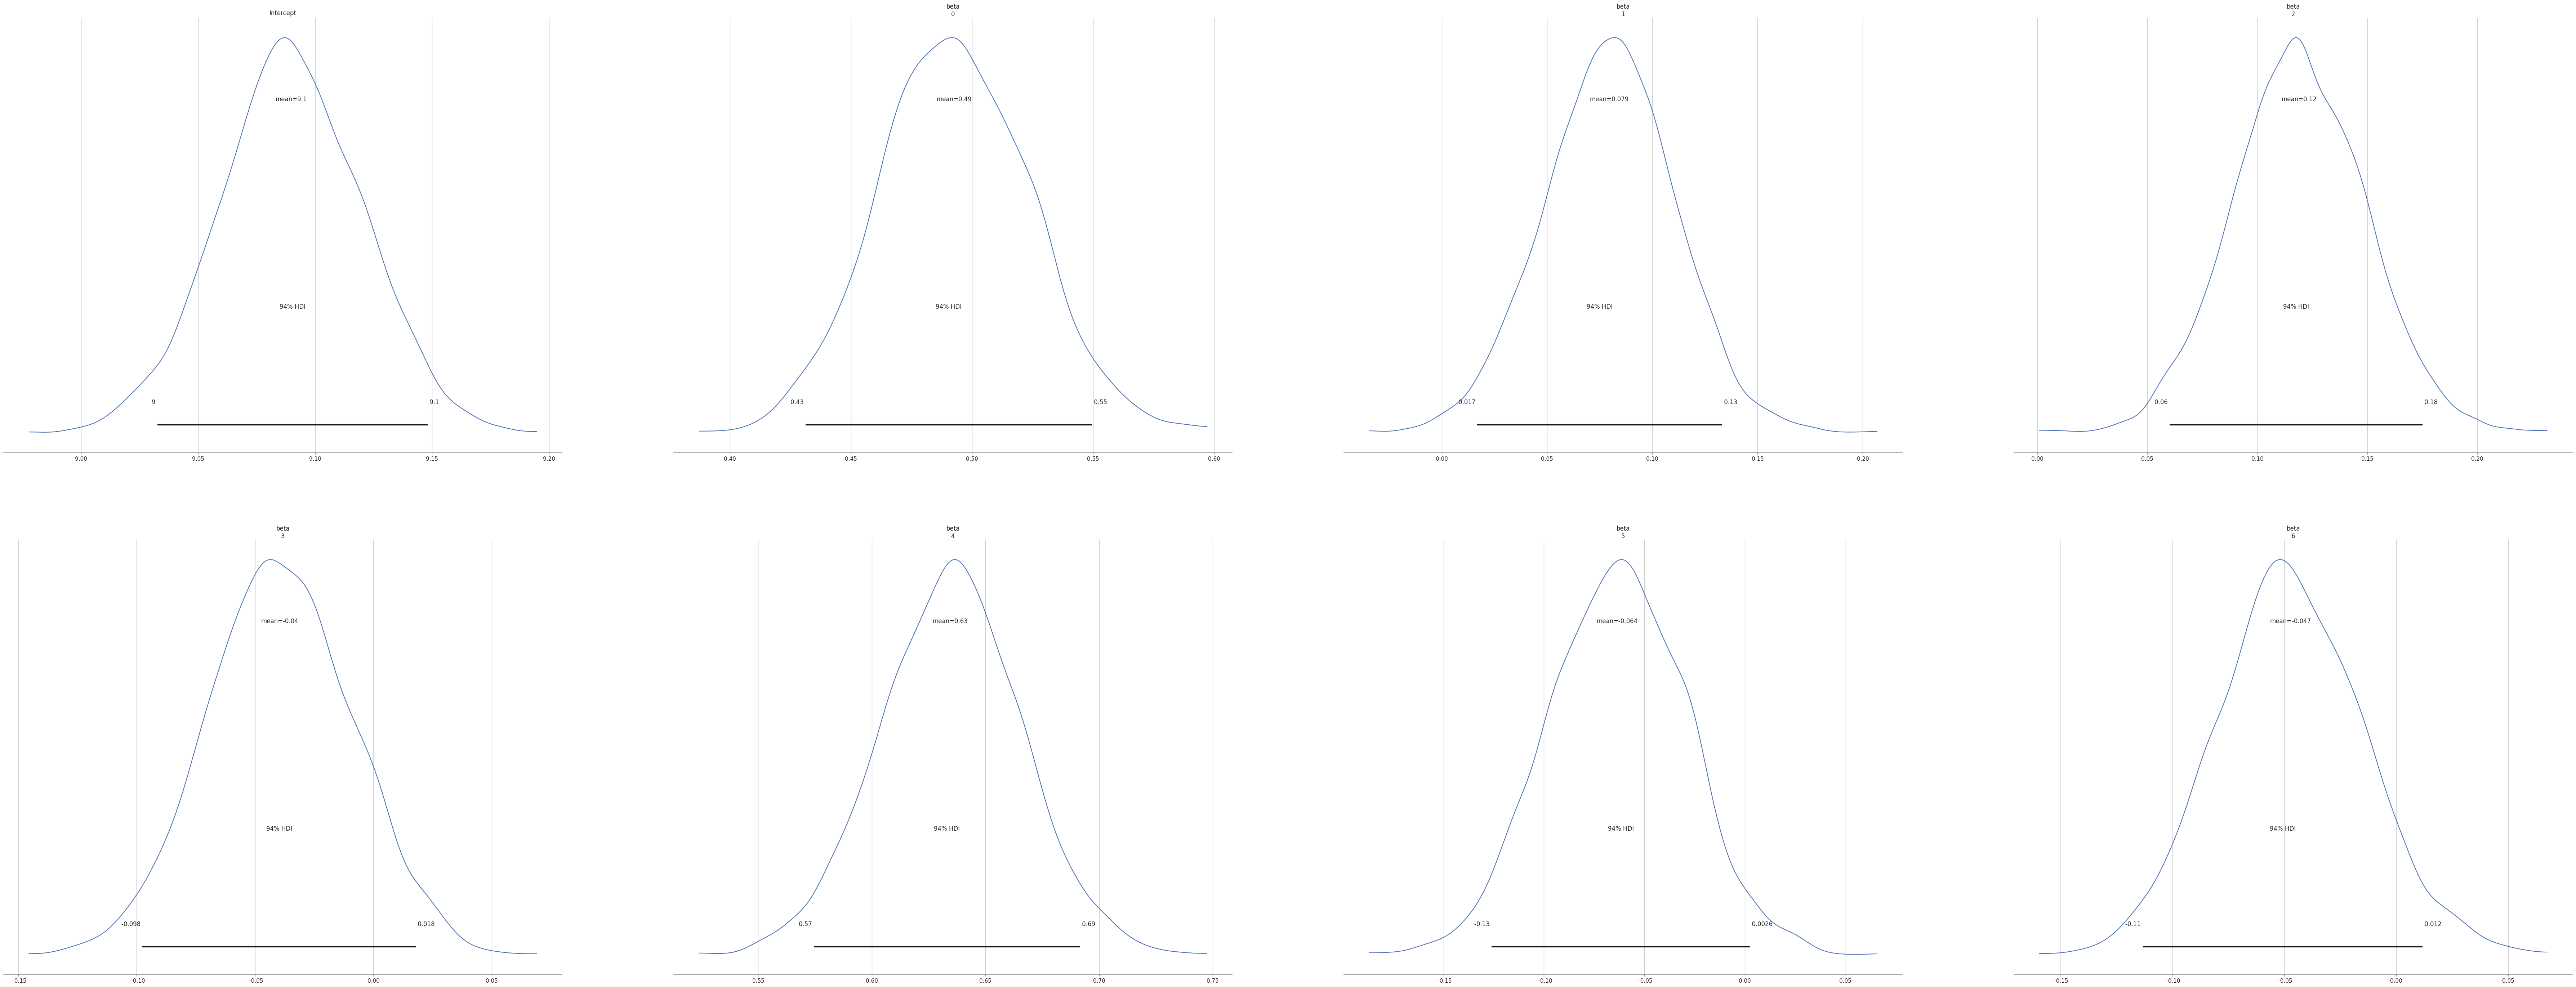

In [188]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

# Define the model
def multiple_linear_regression(X, y):
    with pm.Model() as model:
        # Priors
        intercept = pm.Normal("Intercept", mu=0, sigma=10)
        beta = pm.Normal("beta", mu=0, sigma=10, shape=X.shape[1])

        # Likelihood
        likelihood = pm.Normal("y", mu=intercept + pm.math.dot(X, beta), sigma=1, observed=y)

        # Sampling
        trace = pm.sample(2000, chains=2, cores=2)
    return trace

# Split the data
x2_train = X_train
y2_train = y_train['chargeslog']
x2_test = X_test
y2_test = y_test['chargeslog']

# Fit the model
trace = multiple_linear_regression(x2_train, y2_train)

# Posterior plots

az.plot_trace(trace["posterior"]['Intercept'])

az.plot_trace(trace["posterior"]['beta'])
az.plot_posterior(trace)

In [189]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming y_pred and y_true are your predicted and true values
y_true = np.array([1, 2, 3, 4, 5])  # Replace this with your true values
y_pred = np.array([1.2, 2.5, 2.8, 3.7, 4.2])  # Replace this with your predicted values

# Calculate R-squared
r2 = r2_score(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'R-squared: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')


R-squared: 0.8940
RMSE: 0.4604


In [190]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [191]:
X_train.shape[1]

7

In [192]:
trace['posterior']

<xarray.Dataset>
Dimensions:     (chain: 2, draw: 2000, beta_dim_0: 7)
Coordinates:
  * chain       (chain) int64 0 1
  * draw        (draw) int64 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
  * beta_dim_0  (beta_dim_0) int64 0 1 2 3 4 5 6
Data variables:
    Intercept   (chain, draw) float64 9.121 9.044 9.083 ... 9.099 9.052 9.124
    beta        (chain, draw, beta_dim_0) float64 0.5017 0.07701 ... -0.02705
Attributes:
    created_at:                 2024-03-08T20:20:27.011460
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.10.4
    sampling_time:              8.827386856079102
    tuning_steps:               1000

In [193]:
np.mean(trace['posterior']['beta'].data)

0.16792453708898958

In [194]:
np.mean(trace['posterior']['beta'].data, axis=0).shape

(2000, 7)

In [195]:
print(trace)


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data


Mean squared error: 0.20
Intercept    9.09
beta[0]      0.49
beta[1]      0.08
beta[2]      0.12
beta[3]     -0.04
beta[4]      0.63
beta[5]     -0.06
beta[6]     -0.05
Name: mean, dtype: float64
Coefficients:
 [ 9.08970681  0.49313474  0.07892014  0.11886054 -0.03960717  0.63423294
 -0.06411278 -0.04762001]


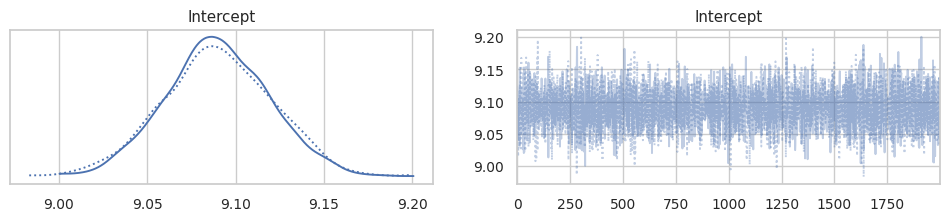

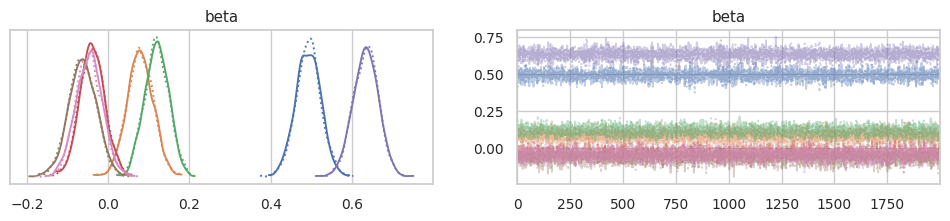

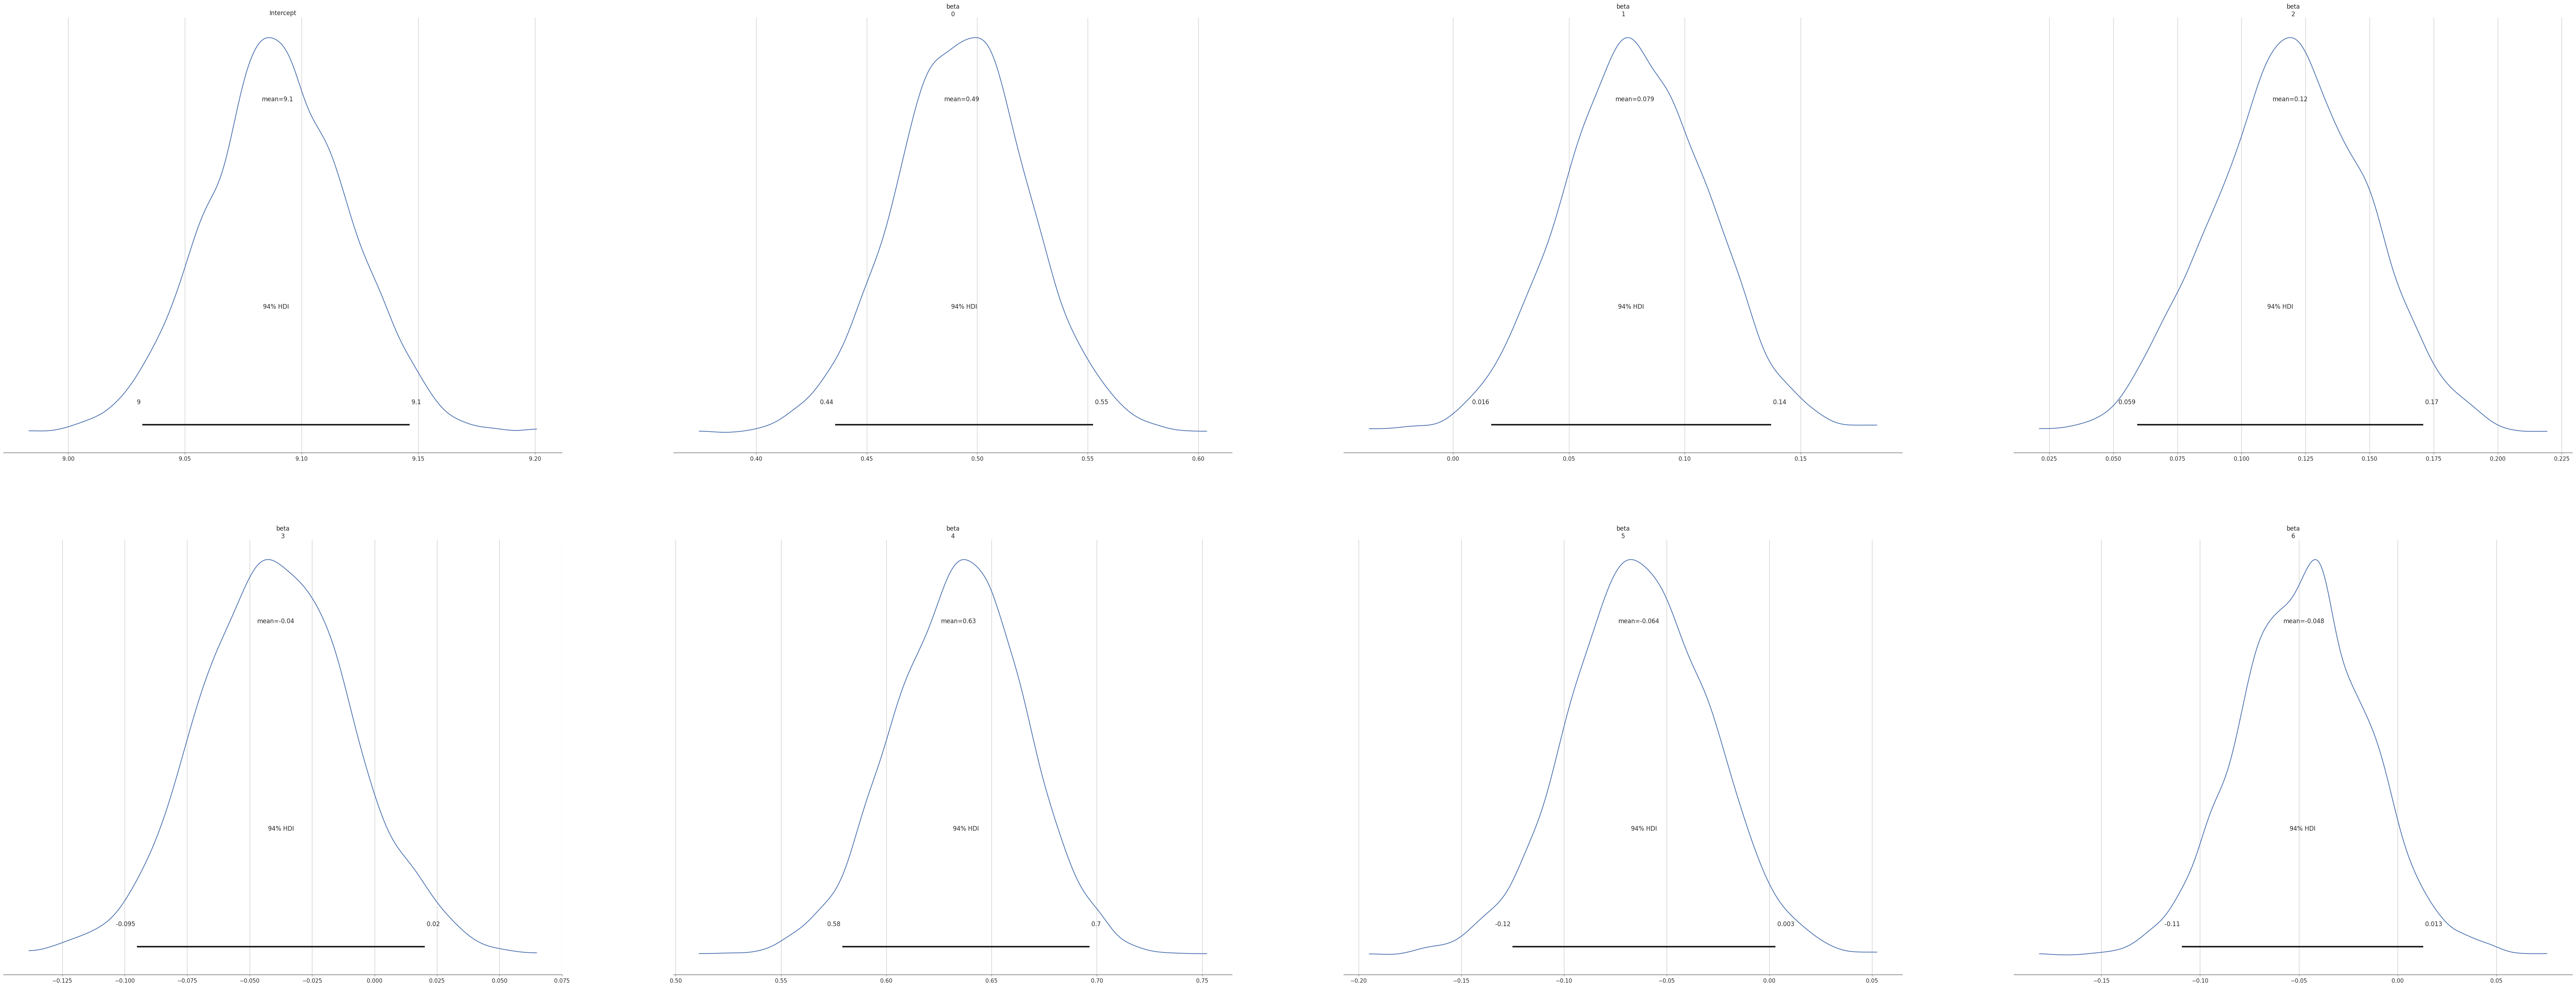

In [196]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

# Define the model
def multiple_linear_regression(X, y):
    with pm.Model() as model:
        # Priors
        intercept = pm.Normal("Intercept", mu=0, sigma=10)
        beta = pm.Normal("beta", mu=0, sigma=10, shape=X.shape[1])

        # Likelihood
        likelihood = pm.Normal("y", mu=intercept + pm.math.dot(X, beta), sigma=1, observed=y)

        # Sampling
        trace = pm.sample(2000, chains=2, cores=2)
    return trace

# Split the data
x2_train = X_train
y2_train = y_train['chargeslog']
x2_test = X_test
y2_test = y_test['chargeslog']

# Fit the model
trace = multiple_linear_regression(x2_train, y2_train)

# Posterior plots
# az.plot_trace(trace)
# az.plot_posterior(trace)


az.plot_trace(trace["posterior"]['Intercept'])

az.plot_trace(trace["posterior"]['beta'])
az.plot_posterior(trace)

# Predict on the test set
intercept = np.mean(trace["posterior"]["Intercept"].data)
beta = np.mean(trace["posterior"]["beta"].data, axis=0)
y_pred = (intercept + np.dot(x2_test, beta.T))


# Mean squared error
mse = np.mean((np.mean(y_pred, axis=1) - y2_test) ** 2)
print(f"Mean squared error: {mse:.2f}")

# Display the coefficients the Bayesian Model
print(pm.summary(trace)["mean"])

# Display the coefficients of the Least Squares Model
print("Coefficients:\n", coef_with_intercept)

In [197]:
# from sklearn.metrics import r2_score, mean_squared_error
# import numpy as np

# # Calculate R-squared
# r2 = r2_score(y_true, y_pred)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# print(f'R-squared: {r2:.4f}')
# print(f'RMSE: {rmse:.4f}')


In [198]:
np.mean(y_pred, axis=1).shape

(268,)

In [199]:
y_pred, y_pred.shape


(array([[ 8.456184  ,  8.51310196,  8.59892367, ...,  8.43330693,
          8.3936813 ,  8.51881267],
        [ 9.89238106,  9.88288289,  9.78096352, ...,  9.72064397,
          9.86525155,  9.99602467],
        [ 8.1162223 ,  8.19447318,  8.24006884, ...,  8.14597392,
          8.16266711,  8.10753091],
        ...,
        [ 8.88232294,  8.83176307,  8.85262604, ...,  8.8763981 ,
          8.83530169,  9.03564754],
        [10.30512725, 10.24352156, 10.1295345 , ..., 10.13390176,
         10.22281474, 10.36238182],
        [ 7.7587996 ,  7.8809105 ,  7.91068344, ...,  7.80043407,
          7.90069925,  7.8548404 ]]),
 (268, 2000))

In [200]:
np.mean(y_pred, axis=1)[0:5]


array([ 8.48844659,  9.8348134 ,  8.1581632 ,  8.61868382, 10.53094635])

In [201]:
y_pred.shape

(268, 2000)

In [202]:
y_test['chargeslog'], np.mean(y_pred, axis=1)

(0      8.40
 1     10.52
 2      7.88
 3      8.51
 4     10.01
        ... 
 263   10.74
 264    8.52
 265    8.94
 266   10.61
 267    7.44
 Name: chargeslog, Length: 268, dtype: float64,
 array([ 8.48844659,  9.8348134 ,  8.1581632 ,  8.61868382, 10.53094635,
        11.13319795,  9.26208955,  9.07465737,  8.10624333,  9.40935766,
         9.32188266,  9.13036517,  8.94072866,  9.25688412,  9.52771461,
         7.75496336,  9.48376791,  9.29419442,  9.51449135,  8.38683504,
         7.9123618 , 10.81190725,  9.41877656,  9.10549194,  9.53570746,
         8.88262064,  8.54697793,  9.39198345, 11.21057734,  7.80989646,
         8.57556522,  9.00160427,  8.84030259,  8.75580871,  8.64047765,
         9.02266195,  8.01913157,  9.00486144,  8.64322961,  9.67613451,
         9.52918042,  9.322621  ,  9.0512827 ,  9.31645685,  8.33023679,
         9.46877655, 10.50954517,  8.88596088,  8.1650781 ,  7.91041866,
         8.85449178,  8.73157838, 10.92989596,  8.67079062,  8.55490228,
      

In [203]:
import pandas as pd

# Assuming y_test and y_pred are Pandas Series
ytest = y_test['chargeslog']
ypred = np.mean(y_pred, axis=1)

# Create a DataFrame with y_test and y_pred as columns
pred_table_test = pd.DataFrame({'y_test': ytest, 'y_pred': ypred})
print(pred_table_test.head(10))

   y_test  y_pred
0    8.40    8.49
1   10.52    9.83
2    7.88    8.16
3    8.51    8.62
4   10.01   10.53
5   10.29   11.13
6    9.10    9.26
7    9.67    9.07
8    7.63    8.11
9    9.38    9.41


In [204]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


# Calculate R-squared
r2 = r2_score(ytest, ypred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, ypred))

print(f'R-squared: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

R-squared: 0.7501
RMSE: 0.4521


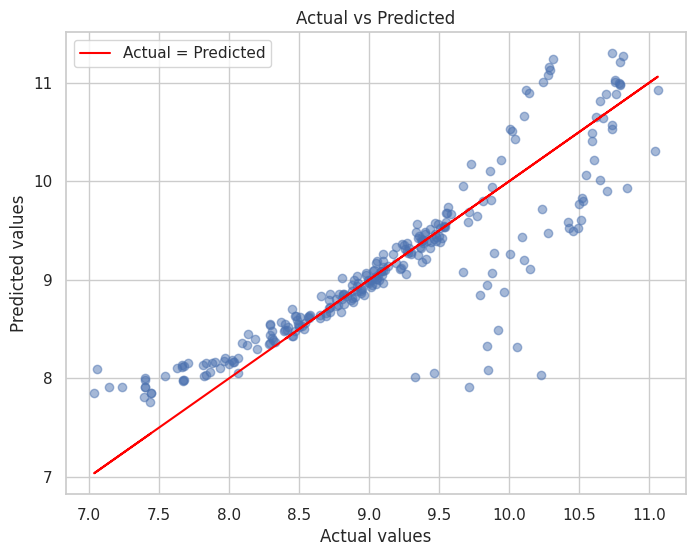

In [205]:
import matplotlib.pyplot as plt

y_pred_mean = np.mean(y_pred, axis=1)
# Plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mean, alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Actual = Predicted')  # Plotting the y_test vs y_test line
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()


### Interpretation:

A smaller mean squared error (MSE) suggests that the model has a better fit to the data.

Therefore, we can conclude that the multiple linear regression model has a better fit to the data compared to the simple linear regression model.

In addition, still in terms of the mean squared error, the Bayesian linear regression model does a better job than the least squared linear regression model.

<p style="background-color:;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> Least Squares versus Bayesian Linear Regression <span style='font-size:28px; background-color:blue ;'>  </span></p>

This code will produce a bar plot that shows the coefficients of the Bayesian and least squared models side by side. The x-axis represents the different coefficients, and the y-axis represents their respective values.

In [206]:
# # Get the coefficients
# bayesian_coefs = pm.summary(trace)["mean"]
# ls_coefs = coef_with_intercept

# # Combine the coefficients into a DataFrame
# coefs_df = pd.DataFrame({"Bayesian": bayesian_coefs, "Least Squares": ls_coefs})

# # Create the bar plot
# sns.set(style="whitegrid")
# ax = coefs_df.plot(kind="bar", rot=0)
# ax.set_xlabel("Coefficients")
# ax.set_ylabel("Value")
# ax.set_title("Comparison of Coefficients")
# plt.show()

### Conclusion:

The Bayesian linear regression may have a smaller mean squared error compared to the least squares linear regression due to the uncertainty estimates provided by the Bayesian model. In Bayesian linear regression, we estimate the posterior distribution of the model parameters given the data, which allows us to obtain a range of plausible values for the parameters, instead of a single point estimate as in least squares regression.

This uncertainty estimate can be particularly helpful in situations where we have limited data or when the data is noisy or has outliers. The uncertainty estimates can help to regularize the model and reduce overfitting. Additionally, Bayesian models allow for the incorporation of prior knowledge, which can be useful in situations where we have some prior knowledge about the relationship between the variables.

Therefore, the Bayesian approach may provide a more robust estimate of the parameters, resulting in better predictions and a smaller mean squared error compared to the least squares approach.